<a href="https://colab.research.google.com/github/nadiradsrn/Study-Case-01---F-Data-Mining-/blob/main/Study_Case_01_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KELOMPOK F**


**1. IMPORT DATA**
---
Data diakses dari github, lalu di sambungkan ke google colabs menggunakan fungsi pd.read_csv, data yang diakses ada beberapa kota yaitu kota Jakarta, Bogor, Bekasi, Tangerang, dan Depok


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import numpy as np
from collections import Counter

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    bekasi2 = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    bekasi2 = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")

dfJ.shape, dfD.shape, dfB.shape, bekasi2.shape, dfX.shape

--2024-09-25 23:48:40--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.003s  

2024-09-25 23:48:40 (21.9 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2024-09-25 23:48:41--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.


((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

In [2]:
jakarta = pd.DataFrame(dfJ)
depok = pd.DataFrame(dfD)
tangerang = pd.DataFrame(bekasi2)
bogor = pd.DataFrame(dfB)
bekasi = pd.DataFrame(dfX)

jakarta.info()
depok.info()
tangerang.info()
bogor.info()
bekasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

In [3]:
jakarta.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,121,121.000000,121.000000,121.000000,121.000000,44.000000,90.000000,121,119,120.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,19,NaN,NaN,NaN,NaN,NaN,NaN,5,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta Barat,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,41,NaN,NaN,NaN,NaN,NaN,NaN,25,90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,247.586777,279.495868,4.272727,3.380165,1.863636,1.955556,NaN,NaN,5425.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,368.384642,285.275631,1.901754,1.709075,1.518734,1.475730,NaN,NaN,7891.589502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,16.000000,21.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,84.000000,97.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,135.000000,200.000000,4.000000,3.000000,1.000000,2.000000,NaN,NaN,3500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,250.000000,350.000000,5.000000,4.000000,2.000000,2.000000,NaN,NaN,4425.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bogor.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,193,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193,193,193.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,27,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Gunung Putri,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,52,NaN,NaN,NaN,NaN,NaN,NaN,26,155,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,143.575130,98.663212,2.694301,1.797927,0.155440,1.310881,NaN,NaN,2076.165803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,191.576208,125.851746,1.110939,1.175087,0.485931,0.905271,NaN,NaN,1562.633932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,30.000000,21.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,900.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,66.000000,36.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,84.000000,58.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,120.000000,90.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tangerang.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,124,124.000000,124.000000,124.000000,124.000000,38.000000,92.000000,124,122,111.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,41,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12-06-2021,NaN,NaN,NaN,NaN,NaN,NaN,"BSD, TANGERANG",SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,102,NaN,NaN,NaN,NaN,NaN,NaN,27,96,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,202.653226,199.491935,3.346774,2.693548,2.210526,1.608696,NaN,NaN,3962.162162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,285.219301,264.097681,1.097257,1.295253,1.862255,1.222109,NaN,NaN,6757.743761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,37.000000,27.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,90.000000,81.500000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,150.500000,125.000000,3.000000,2.000000,2.000000,1.000000,NaN,NaN,2200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,250.000000,240.000000,4.000000,3.000000,2.000000,2.000000,NaN,NaN,3500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bekasi.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,107,107.000000,107.000000,107.000000,106.000000,33.000000,81.000000,107,106,101.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Kota Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,NaN,NaN,NaN,NaN,NaN,NaN,73,95,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,108.822430,110.635514,2.962617,1.943396,1.090909,1.086420,NaN,NaN,2056.435644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,59.164914,71.755270,1.027226,0.848867,0.291937,0.282734,NaN,NaN,969.578861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,36.000000,30.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,72.000000,60.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,91.000000,90.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,130.500000,144.000000,4.000000,2.750000,1.000000,1.000000,NaN,NaN,2200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
depok.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,119,120,118.000000,118.000000,118.000000,25.000000,94.000000,118,118,103.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,4,58,NaN,NaN,NaN,NaN,NaN,11,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,5-12-2021,50,NaN,NaN,NaN,NaN,NaN,Sawangan,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,74,12,NaN,NaN,NaN,NaN,NaN,30,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,92.618644,2.737288,1.940678,1.760000,1.670213,NaN,NaN,2147.572816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,92.630404,1.024720,0.980950,1.392839,1.061428,NaN,NaN,1166.261386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,15.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,46.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,61.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,102.250000,3.000000,2.000000,2.000000,2.000000,NaN,NaN,2200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Interpretasi**
1. Kualitas data buruk, karena terdapat kolom Unnamed dan berisan yang full NaN (Missing value) dan data perlu diperbaiki
2. Saran kami untuk memperbaiki data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul adalah dengan menghapus missing value, menghapus duplikat data, dan juga menghapus variable yang tidak diperlukan, seperti URL dan Unnamed. Alasan tidak diperlukannya URL karena Karena kolom URL tidak memberikan nilai signifikan bagi analisis dan dapat mempersulit proses penghapusan data duplikat serta menyebabkan banyaknya entri yang bersifat unik, disarankan untuk menghapus kolom tersebut guna mempermudah proses pembersihan data.
Selain itu, terdapat data kota yang berdeda dengan variabel yang sama tetapi satuannya berbeda, jadi kami juga menyarankan agar perusahaan memperhatikan kekonsistensian dalam memilih suatu satuan, seperti dalam variabel luas tanah, luas bangunan, serta harga sehingga akan lebih memudahkan proses perbandingan dan penggabungan data.


**2. PREPROCESSING DATA**

In [8]:
jakarta = jakarta.drop(columns=['URL', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])

jakarta

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
subset_jakarta = jakarta.columns.difference(['deskripsi'])
jakarta1 = jakarta.drop_duplicates(subset=subset_jakarta)
jakarta1.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...
120,06-12-2021,144.0,250.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM,3500.0,Timur,2.250000e+09,Rumah Modern Minimalis dengan 2 lantai di Jati...
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
jakarta2 = jakarta1.drop(index=121)
jakarta2.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...
120,06-12-2021,144.0,250.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM,3500.0,Timur,2.250000e+09,Rumah Modern Minimalis dengan 2 lantai di Jati...


In [11]:
print(jakarta2.shape)
jakarta2.duplicated().sum()

(121, 13)


0

**Menghapus baris yang berisi missing value pada data Jakarta**

In [12]:
bekasi = bekasi.drop(columns=['URL','Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])

bekasi

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
subset_bekasi = bekasi.columns.difference(['deskripsi'])
bekasi1 = bekasi.drop_duplicates(subset=subset_bekasi)
bekasi1.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,"Lokasi Super Strategis, Selangkah menuju Kota ..."
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bekasi2 = bekasi1.drop(index=107)
bekasi2.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
101,01-12-2021,108.0,47.0,2.0,1.0,NaN,1.0,Kota Bekasi,SHM,1300.0,NaN,1.000000e+09,"Rumah siap,di salah satu cluster grand wisata,..."
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,"Lokasi Super Strategis, Selangkah menuju Kota ..."


In [15]:
print(bekasi2.shape)
bekasi2.duplicated().sum()

(103, 13)


0

**Menghapus baris yang berisi missing value pada data Bekasi**

In [16]:
depok = depok.drop(columns=['URL', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])

depok

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
subset_depok = depok.columns.difference(['deskripsi'])
depok1 = depok.drop_duplicates(subset=subset_depok)
depok1.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1750.0,Dijual cepat rumah bagus siap huni
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,-harga yang kami gunakan adalah per satuan juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
indeks_yang_diinginkan = [118, 120, 121]
depok2 = depok1.drop(indeks_yang_diinginkan)
depok2.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,NaN,NaN,750.0,Rumah di Depok Timur
114,4-12-2021,72,45.0,2.0,1.0,NaN,1.0,Cimanggis,SHM,NaN,NaN,1000.0,PERUMAHAN NUANSA PERMAI DEPOK
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1750.0,Dijual cepat rumah bagus siap huni


In [19]:
print(jakarta2.shape)
jakarta2.duplicated().sum()

(121, 13)


0

**Menghapus baris yang berisi missing value pada data Depok**

In [20]:
tangerang = tangerang.drop(columns=[ 'URL', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])

tangerang

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,Akses Mudah: 10 Menit Ke stasiun kereta poris ...
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
subset_tangerang = tangerang.columns.difference(['deskripsi'])
tangerang1 = tangerang.drop_duplicates(subset=subset_tangerang)
tangerang1.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,Akses Mudah: 10 Menit Ke stasiun kereta poris ...
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
tangerang2 = tangerang1.drop(index=124)
tangerang2.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


In [23]:
print(tangerang2.shape)
tangerang2.duplicated().sum()

(124, 13)


0

**Menghapus baris yang berisi missing value pada data Tangerang**

In [24]:
bogor = bogor.drop(columns=['URL', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])

bogor

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,"Dekat tol jati warna, dekat sutle busway, deka..."
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08,Destinasi menarik di kawasan Babakan Madang; G...
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08,Destinasi menarik di kawasan Babakan Madang; G...
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09,Destinasi menarik di kawasan Babakan Madang; G...
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
subset_bogor = bogor.columns.difference(['deskripsi'])
bogor1 = bogor.drop_duplicates(subset=subset_bogor)
bogor1.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
189,03-12-2021,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,NaN,4.086500e+08,Rumah siap huni
190,03-12-2021,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,NaN,1.200000e+09,Cuma 10 menit ke kota
191,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,NaN,4.405500e+08,"Dekat rumah sakit, dekat pasar"
192,03-12-2021,72.0,90.0,3.0,2.0,1.0,1.0,Cibinong,SHM,2200.0,NaN,9.000000e+08,"Nyaman, aman, swimming pool"
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
bogor2 = bogor1.drop(index=193)
bogor2.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
188,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,NaN,4.405500e+08,"Dekat taman buah mekarsari, dekat rumah sakit"
189,03-12-2021,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,NaN,4.086500e+08,Rumah siap huni
190,03-12-2021,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,NaN,1.200000e+09,Cuma 10 menit ke kota
191,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,NaN,4.405500e+08,"Dekat rumah sakit, dekat pasar"
192,03-12-2021,72.0,90.0,3.0,2.0,1.0,1.0,Cibinong,SHM,2200.0,NaN,9.000000e+08,"Nyaman, aman, swimming pool"


In [27]:
print(bogor2.shape)
bogor2.duplicated().sum()

(193, 13)


0

**Menghapus baris yang berisi missing value pada data Bogor**

In [28]:
jakarta2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,77
carport,31
lokasi,0
sertifikat,2
listrik,1


In [29]:
bekasi2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,1
garasi,72
carport,25
lokasi,0
sertifikat,1
listrik,6


In [30]:
tangerang2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,86
carport,32
lokasi,0
sertifikat,2
listrik,13


In [31]:
bogor2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [32]:
depok2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,87
carport,19
lokasi,0
sertifikat,0
listrik,10


In [33]:
jakarta2["KM"] = jakarta2["KM"].replace(np.nan, 0)
jakarta2["garasi"] = jakarta2["garasi"].replace(np.nan, 0)
jakarta2["carport"] = jakarta2["carport"].replace(np.nan, 0)
jakarta2["sertifikat"] = jakarta2["sertifikat"].replace(np.nan, 'none')
jakarta2["hadap"] = jakarta2["hadap"].replace(np.nan, 'none')
jakarta2["listrik"] = jakarta2["listrik"].replace(np.nan, 0)
jakarta2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,none,4.500000e+09,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,none,1.100000e+09,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,none,3.950000e+08,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,none,8.350000e+08,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,none,1.100000e+09,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,none,3.850000e+09,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,0.0,2.0,Jakarta Timur,SHM,2200.0,none,8.800000e+08,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,0.0,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [34]:
jakarta2['hadap'] = jakarta2['hadap'].astype('category')
jakarta2['lokasi'] = jakarta2['lokasi'].astype('category')
jakarta2['sertifikat'] = jakarta2['sertifikat'].astype('category')
jakarta2['LT'] = jakarta2['LT'].astype('int')
jakarta2['LB'] = jakarta2['LB'].astype('int')
jakarta2['KT'] = jakarta2['KT'].astype('int')
jakarta2['KM'] = jakarta2['KM'].astype('int')
jakarta2['garasi'] = jakarta2['garasi'].astype('int')
jakarta2['carport'] = jakarta2['carport'].astype('int')
jakarta2['listrik'] = jakarta2['listrik'].astype('int')
jakarta2['harga'] = jakarta2['harga'].astype('int')

In [35]:
jakarta2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [36]:
bekasi2["KM"] = bekasi2["KM"].replace(np.nan, 0)
bekasi2["garasi"] = bekasi2["garasi"].replace(np.nan, 0)
bekasi2["carport"] = bekasi2["carport"].replace(np.nan, 0)
bekasi2["sertifikat"] = bekasi2["sertifikat"].replace(np.nan, 'none')
bekasi2["hadap"] = bekasi2["hadap"].replace(np.nan, 'none')
bekasi2["listrik"] = bekasi2["listrik"].replace(np.nan, 0)
bekasi2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,1300.0,none,5.500000e+08,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,0.0,none,4.400000e+08,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,0.0,none,6.990000e+08,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,01-12-2021,108.0,47.0,2.0,1.0,0.0,1.0,Kota Bekasi,SHM,1300.0,none,1.000000e+09,"Rumah siap,di salah satu cluster grand wisata,..."
102,01-12-2021,180.0,220.0,5.0,3.0,0.0,0.0,Kota Bekasi,SHM,2200.0,none,1.600000e+09,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,0.0,0.0,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,none,2.500000e+08,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."


In [37]:
bekasi2['hadap'] = bekasi2['hadap'].astype('category')
bekasi2['lokasi'] = bekasi2['lokasi'].astype('category')
bekasi2['sertifikat'] = bekasi2['sertifikat'].astype('category')
bekasi2['LT'] = bekasi2['LT'].astype('int')
bekasi2['LB'] = bekasi2['LB'].astype('int')
bekasi2['KT'] = bekasi2['KT'].astype('int')
bekasi2['KM'] = bekasi2['KM'].astype('int')
bekasi2['garasi'] = bekasi2['garasi'].astype('int')
bekasi2['carport'] = bekasi2['carport'].astype('int')
bekasi2['listrik'] = bekasi2['listrik'].astype('int')
bekasi2['harga'] = bekasi2['harga'].astype('int')

In [38]:
bekasi2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [39]:
depok2["KM"] = depok2["KM"].replace(np.nan, 0)
depok2["garasi"] = depok2["garasi"].replace(np.nan, 0)
depok2["carport"] = depok2["carport"].replace(np.nan, 0)
depok2["sertifikat"] = depok2["sertifikat"].replace(np.nan, 'none')
depok2["hadap"] = depok2["hadap"].replace(np.nan, 'none')
depok2["listrik"] = depok2["listrik"].replace(np.nan, 0)
depok2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,0.0,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,none,250.0,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,Barat,250.0,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,0.0,0.0,Cimanggis,SHM,1300.0,none,250.0,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,Timur,350.0,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,0.0,none,750.0,Rumah di Depok Timur
114,4-12-2021,72,45.0,2.0,1.0,0.0,1.0,Cimanggis,SHM,0.0,none,1000.0,PERUMAHAN NUANSA PERMAI DEPOK
115,4-12-2021,40,40.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,Timur,195.0,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,Selatan,185.0,rumah semi minimalis dua kamar siap huni di ci...


In [40]:
depok2['hadap'] = depok2['hadap'].astype('category')
depok2['lokasi'] = depok2['lokasi'].astype('category')
depok2['sertifikat'] = depok2['sertifikat'].astype('category')
depok2['LT'] = depok2['LT'].astype('int')
depok2['LB'] = depok2['LB'].astype('int')
depok2['KT'] = depok2['KT'].astype('int')
depok2['KM'] = depok2['KM'].astype('int')
depok2['garasi'] = depok2['garasi'].astype('int')
depok2['carport'] = depok2['carport'].astype('int')
depok2['listrik'] = depok2['listrik'].astype('int')
depok2['harga'] = depok2['harga'].astype('int')

In [41]:
depok2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [42]:
tangerang2["KM"] = tangerang2["KM"].replace(np.nan, 0)
tangerang2["garasi"] = tangerang2["garasi"].replace(np.nan, 0)
tangerang2["carport"] = tangerang2["carport"].replace(np.nan, 0)
tangerang2["sertifikat"] = tangerang2["sertifikat"].replace(np.nan, 'none')
tangerang2["hadap"] = tangerang2["hadap"].replace(np.nan, 'none')
tangerang2["listrik"] = tangerang2["listrik"].replace(np.nan, 0)
tangerang2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,0.0,0.0,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,none,480.0,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,none,600.0,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,0.0,0.0,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,none,4250.0,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,0.0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,none,1700.0,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,0.0,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,none,711.0,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,0.0,1.0,"Ciater, Tangerang",SHM,1300.0,none,850.0,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,none,1800.0,"Fasilitas Terdekat :Lokasi strategis, berada d..."


In [43]:
tangerang2['hadap'] = tangerang2['hadap'].astype('category')
tangerang2['lokasi'] = tangerang2['lokasi'].astype('category')
tangerang2['sertifikat'] = tangerang2['sertifikat'].astype('category')
tangerang2['LT'] = tangerang2['LT'].astype('int')
tangerang2['LB'] = tangerang2['LB'].astype('int')
tangerang2['KT'] = tangerang2['KT'].astype('int')
tangerang2['KM'] = tangerang2['KM'].astype('int')
tangerang2['garasi'] = tangerang2['garasi'].astype('int')
tangerang2['carport'] = tangerang2['carport'].astype('int')
tangerang2['listrik'] = tangerang2['listrik'].astype('int')
tangerang2['harga'] = tangerang2['harga'].astype('int')

In [44]:
tangerang2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [45]:
bogor2["KM"] = bogor2["KM"].replace(np.nan, 0)
bogor2["garasi"] = bogor2["garasi"].replace(np.nan, 0)
bogor2["carport"] = bogor2["carport"].replace(np.nan, 0)
bogor2["sertifikat"] = bogor2["sertifikat"].replace(np.nan, 'none')
bogor2["hadap"] = bogor2["hadap"].replace(np.nan, 'none')
bogor2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,"Dekat tol jati warna, dekat sutle busway, deka..."
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,none,8.114000e+08,Destinasi menarik di kawasan Babakan Madang; G...
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,none,9.005000e+08,Destinasi menarik di kawasan Babakan Madang; G...
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,none,1.001900e+09,Destinasi menarik di kawasan Babakan Madang; G...
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,none,1.200800e+09,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,none,4.405500e+08,"Dekat taman buah mekarsari, dekat rumah sakit"
189,03-12-2021,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,none,4.086500e+08,Rumah siap huni
190,03-12-2021,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,none,1.200000e+09,Cuma 10 menit ke kota
191,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,none,4.405500e+08,"Dekat rumah sakit, dekat pasar"


In [46]:
bogor2['hadap'] = bogor2['hadap'].astype('category')
bogor2['lokasi'] = bogor2['lokasi'].astype('category')
bogor2['sertifikat'] = bogor2['sertifikat'].astype('category')
bogor2['LT'] = bogor2['LT'].astype('int')
bogor2['LB'] = bogor2['LB'].astype('int')
bogor2['KT'] = bogor2['KT'].astype('int')
bogor2['KM'] = bogor2['KM'].astype('int')
bogor2['garasi'] = bogor2['garasi'].astype('int')
bogor2['carport'] = bogor2['carport'].astype('int')
bogor2['listrik'] = bogor2['listrik'].astype('int')
bogor2['harga'] = bogor2['harga'].astype('int')

In [47]:
bogor2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


Untuk merapikan data yang berisikan NaN kita menghapus kolom yang berisikan data NaN dengan menggunakan fungsi drop_duplicates. Selanjutnya kita menggunakan fungsi isnull().sum() untuk merubah data Nan menjadi "0" untuk float dan "none" untuk category

**Setelah tidak ada missing value pada data, sekarang kita bisa mengecek distribusi data, serta memisahkan outlier dengan median**

**1.Harga Rumah di Bekasi**

<ipython-input-48-19fa2df8dbaa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  hargalokasi_bekasi = sns.catplot(x="harga", y="lokasi", data=bekasi2, palette = "dark")


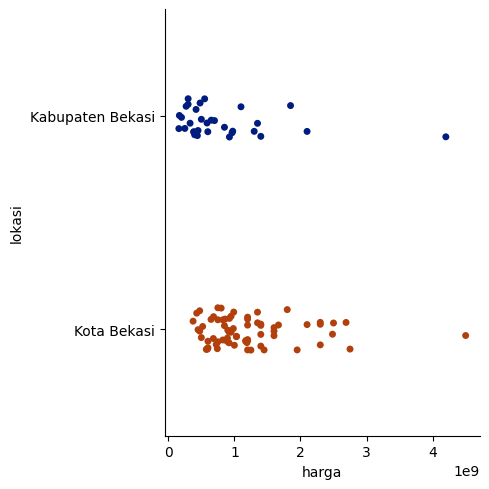

In [48]:
hargalokasi_bekasi = sns.catplot(x="harga", y="lokasi", data=bekasi2, palette = "dark")

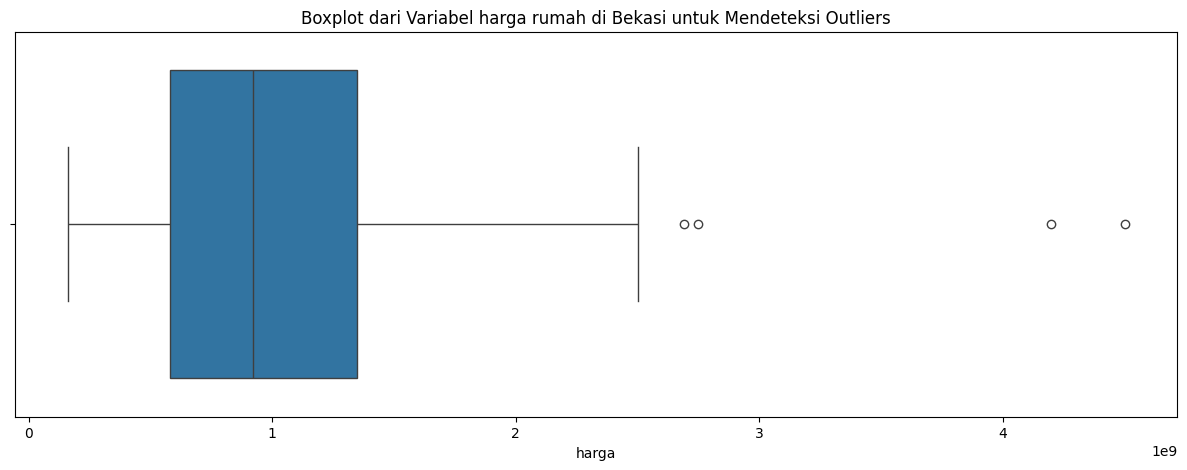

In [49]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=bekasi2["harga"], orient="y")
plt.title('Boxplot dari Variabel harga rumah di Bekasi untuk Mendeteksi Outliers')
plt.show()

In [50]:
Q1 = bekasi2["harga"].quantile(0.25)
Q2 = bekasi2["harga"].quantile(0.50)
Q3 = bekasi2["harga"].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.

no_outlier = (bekasi2["harga"] >= Q1 - 1.5 * IQR) & (bekasi2["harga"] <= Q3 + 1.5 *IQR)

# Creating DataFrame Without Outliers
bekasi2_out = bekasi2[no_outlier]
bekasi2_outlier = bekasi2[~no_outlier]

In [51]:
bekasi2_out

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,08-12-2021,71,43,2,1,0,1,Kabupaten Bekasi,SHM,1300,none,550000000,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59,60,2,1,0,1,Kabupaten Bekasi,SHM,0,none,440000000,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124,95,2,1,0,1,Kabupaten Bekasi,SHM,0,none,699000000,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144,100,2,1,0,1,Kabupaten Bekasi,SHM,2200,Selatan,1350000000,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108,100,3,2,0,1,Kabupaten Bekasi,SHM,2200,Timur,1400000000,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,01-12-2021,108,47,2,1,0,1,Kota Bekasi,SHM,1300,none,1000000000,"Rumah siap,di salah satu cluster grand wisata,..."
102,01-12-2021,180,220,5,3,0,0,Kota Bekasi,SHM,2200,none,1600000000,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140,250,3,2,0,0,Kabupaten Bekasi,SHM,2200,Selatan,850000000,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60,55,2,1,0,0,Kabupaten Bekasi,SHM,1300,none,250000000,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."


In [52]:
bekasi2_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
7,07-12-2021,336,200,4,3,0,1,Kabupaten Bekasi,HGB,5500,none,4200000000,"Harga Rp 4,2 Miliyar ( Nego ); Luas Tanah 336 ..."
15,06-12-2021,245,117,3,2,0,0,Kota Bekasi,SHM,2200,Timur,2750000000,"Rumah 1 lantai Hook, Lokasi yang Strategis dek..."
31,06-12-2021,200,293,6,4,1,1,Kota Bekasi,SHM,5500,none,4500000000,"Jual cepat rumah mewah harga murah , 3 Lantai,..."
100,01-12-2021,144,180,4,3,0,2,Kota Bekasi,SHM,4400,none,2690000000,Rumah cantik furmished dan renovasi di asera o...


<ipython-input-53-fb8fc8a4e95a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bekasi2outlier = sns.catplot(x="lokasi", y="harga", data=bekasi2_outlier, palette = "dark")


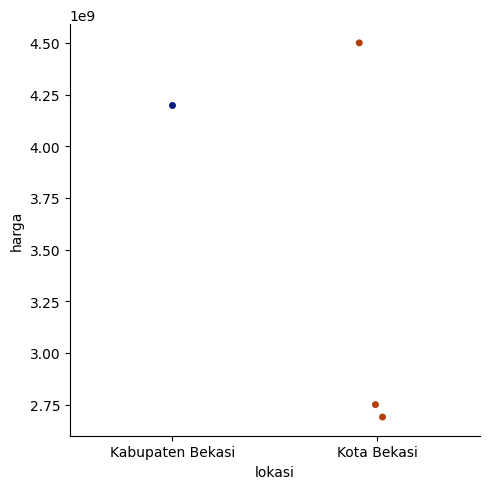

In [53]:
bekasi2outlier = sns.catplot(x="lokasi", y="harga", data=bekasi2_outlier, palette = "dark")

<ipython-input-54-7fb309ce34b1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bekasi2out = sns.catplot(x="harga", y="lokasi", data=bekasi2_out, palette = "dark")


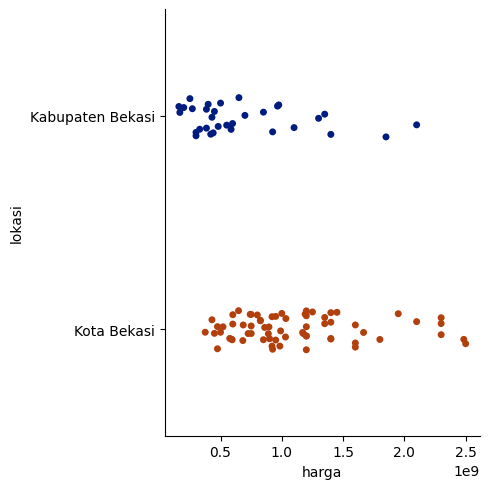

In [54]:
bekasi2out = sns.catplot(x="harga", y="lokasi", data=bekasi2_out, palette = "dark")

In [55]:
bekasi2.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02
mean,108.737864,109.252427,2.961165,1.912621,0.330097,0.825243,1948.543689,1.070933e+09
std,59.380785,71.384586,1.028251,0.864403,0.531154,0.531870,1070.995879,7.507375e+08
min,36.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+08
25%,72.000000,60.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,5.805000e+08
50%,91.000000,90.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,9.200000e+08
75%,130.500000,143.500000,3.500000,2.000000,1.000000,1.000000,2200.000000,1.350000e+09
max,364.000000,494.000000,7.000000,4.000000,2.000000,2.000000,5500.000000,4.500000e+09


**2.Harga Rumah di Jakarta**

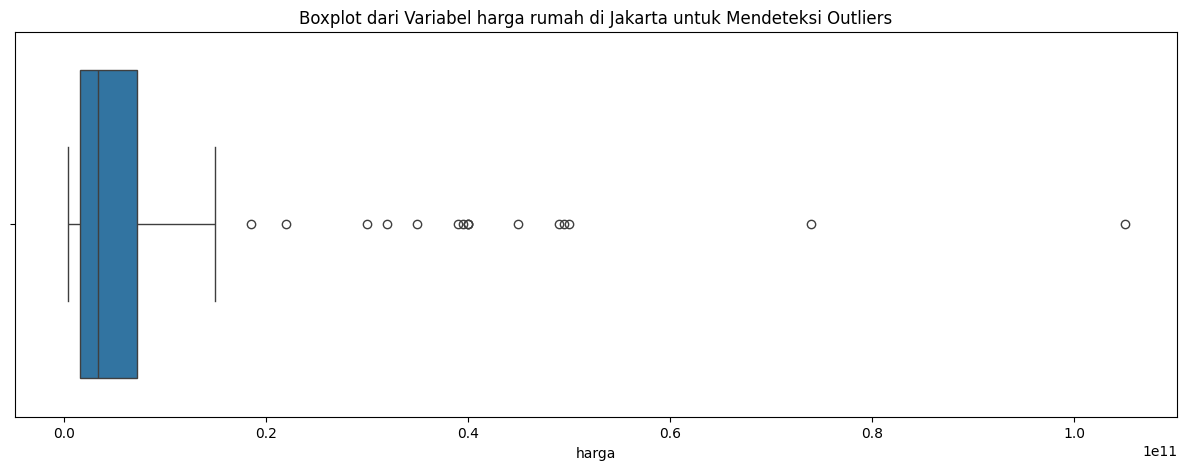

In [56]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=jakarta2["harga"], orient="h")
plt.title('Boxplot dari Variabel harga rumah di Jakarta untuk Mendeteksi Outliers')
plt.show()

<ipython-input-57-c353bbba1eca>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  hargalokasi_jakarta = sns.catplot(x="harga", y="lokasi", data=jakarta2, palette = "dark")


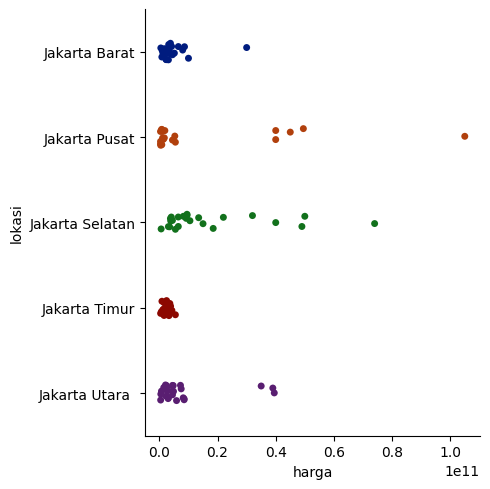

In [57]:
hargalokasi_jakarta = sns.catplot(x="harga", y="lokasi", data=jakarta2, palette = "dark")

In [58]:
Q1 = jakarta2["harga"].quantile(0.25)
Q2 = jakarta2["harga"].quantile(0.50)
Q3 = jakarta2["harga"].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.

no_outlier = (jakarta2["harga"] >= Q1 - 1.5 * IQR) & (jakarta2["harga"] <= Q3 + 1.5 *IQR)

# Creating DataFrame Without Outliers
jakarta2_out = jakarta2[no_outlier]
jakarta2_outlier = jakarta2[~no_outlier]

In [59]:
jakarta2_out

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,06-12-2021,202,198,8,3,0,0,Jakarta Pusat,SHM,2200,none,4500000000,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30,55,2,1,0,1,Jakarta Pusat,SHM,2200,none,1100000000,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,none,395000000,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33,42,2,2,0,1,Jakarta Pusat,SHM,2200,none,835000000,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30,55,2,2,0,1,Jakarta Pusat,SHM,2200,none,1100000000,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220,239,5,4,1,2,Jakarta Timur,PPJB,3500,none,3850000000,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70,57,3,2,0,2,Jakarta Timur,SHM,2200,none,880000000,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315,280,4,3,1,2,Jakarta Timur,SHM + IMB,3500,Timur,4300000000,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135,190,5,5,0,2,Jakarta Timur,SHM + IMB,2200,Selatan,3400000000,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [60]:
jakarta2_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
6,06-12-2021,424,1000,4,5,1,1,Jakarta Pusat,SHM,33000,Timur,49500000000,"Rumah mewah berkonsep hotel bintang 5, interio..."
7,06-12-2021,597,700,5,4,2,5,Jakarta Pusat,SHM,8000,none,40000000000,Lokasi strategis hanya 5 menit ke pusat kulin...
17,05-12-2021,652,405,5,4,0,4,Jakarta Pusat,SHM,6600,none,45000000000,Dapat dinego
18,05-12-2021,840,800,5,3,0,8,Jakarta Pusat,SHGB,6600,none,39990000000,"1 Arah, Trotoar Besar, pepohonan rindang asri ..."
21,07-12-2021,700,2000,10,10,0,10,Jakarta Pusat,SHM,66000,Utara,105000000000,- 2 menit ke Grand Indonesia (500 meter)\n- 5 ...
34,06-12-2021,485,550,3,5,1,1,Jakarta Selatan,SHM + IMB,18000,none,22000000000,- Ruang Musik\n- Kitchen set ( dapur kotor dan...
40,06-12-2021,612,485,5,4,1,2,Jakarta Selatan,SHM,13000,none,18500000000,- Lantai Bawah : Master Bed Room dengan kamar ...
41,06-12-2021,790,700,6,6,0,6,Jakarta Selatan,SHM,7700,none,32000000000,Ada kolam renang
42,05-12-2021,950,1400,6,4,7,0,Jakarta Selatan,SHM,23000,none,49000000000,"Lantai 1 :\n- 1 Living Room, Family Room, Dinn..."
44,07-12-2021,738,500,5,3,2,2,Jakarta Selatan,SHM + IMB,13200,none,74000000000,- Unfurnished dan Air Jetpump\n- Berada dalam ...


<ipython-input-61-6dd247938ec5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  jakarta2outlier = sns.catplot(x="harga", y="lokasi", data=jakarta2_outlier, palette = "dark")


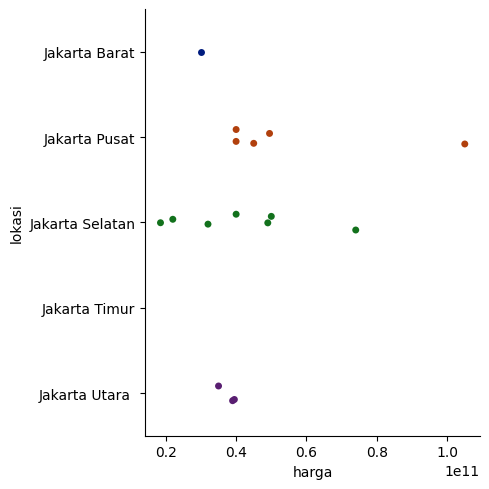

In [61]:
jakarta2outlier = sns.catplot(x="harga", y="lokasi", data=jakarta2_outlier, palette = "dark")

<ipython-input-62-67ad8f6d7c9c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  jakarta2out = sns.catplot(x="harga", y="lokasi", data=jakarta2_out, palette = "dark")


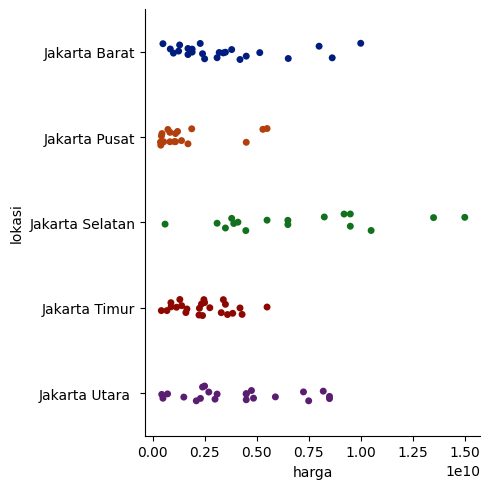

In [62]:
jakarta2out = sns.catplot(x="harga", y="lokasi", data=jakarta2_out, palette = "dark")

In [63]:
jakarta2.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,1.210000e+02
mean,247.586777,279.495868,4.272727,3.380165,0.677686,1.454545,5380.165289,8.985955e+09
std,368.384642,285.275631,1.901754,1.709075,1.279420,1.532971,7874.099100,1.587610e+10
min,16.000000,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.800000e+08
25%,84.000000,97.000000,3.000000,2.000000,0.000000,0.000000,2200.000000,1.600000e+09
50%,135.000000,200.000000,4.000000,3.000000,0.000000,1.000000,3500.000000,3.400000e+09
75%,250.000000,350.000000,5.000000,4.000000,1.000000,2.000000,4400.000000,7.250000e+09
max,3422.000000,2000.000000,10.000000,10.000000,8.000000,10.000000,66000.000000,1.050000e+11


**3. Harga rumah di Bogor**

<ipython-input-64-83ef412c3ff6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  hargalokasi_bogor = sns.catplot(x="harga", y="lokasi", data=bogor2, palette = "dark")


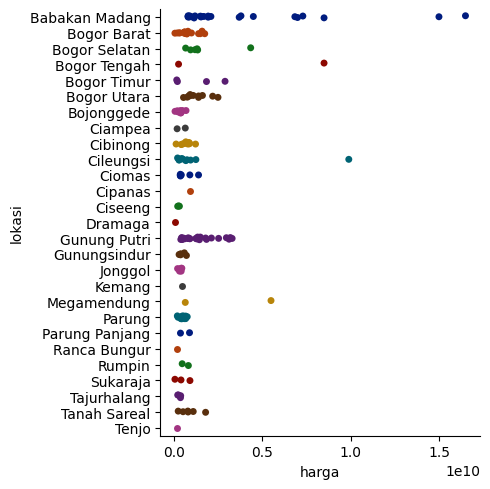

In [64]:
hargalokasi_bogor = sns.catplot(x="harga", y="lokasi", data=bogor2, palette = "dark")

In [65]:
Q1 = bogor2["harga"].quantile(0.25)
Q2 = bogor2["harga"].quantile(0.50)
Q3 = bogor2["harga"].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.

no_outlier = (bogor2["harga"] >= Q1 - 1.5 * IQR) & (bogor2["harga"] <= Q3 + 1.5 *IQR)

# Creating DataFrame Without Outliers
bogor2_out = bogor2[no_outlier]
bogor2_outlier = bogor2[~no_outlier]

In [66]:
bogor2_out

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,03-12-2021,75,38,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,"Dekat tol jati warna, dekat sutle busway, deka..."
1,06-12-2021,60,40,1,1,0,1,Babakan Madang,SHM,2200,none,811400000,Destinasi menarik di kawasan Babakan Madang; G...
2,06-12-2021,60,50,2,2,0,1,Babakan Madang,SHM,2200,none,900500000,Destinasi menarik di kawasan Babakan Madang; G...
3,06-12-2021,60,70,3,2,0,1,Babakan Madang,SHM,2200,none,1001900000,Destinasi menarik di kawasan Babakan Madang; G...
4,06-12-2021,90,60,3,2,0,2,Babakan Madang,SHM,2200,none,1200800000,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,03-12-2021,90,36,2,1,0,1,Gunung Putri,SHM,1300,none,440550000,"Dekat taman buah mekarsari, dekat rumah sakit"
189,03-12-2021,107,31,2,1,0,1,Sukaraja,SHM,1300,none,408650000,Rumah siap huni
190,03-12-2021,210,150,4,2,1,1,Bogor Selatan,SHM,2200,none,1200000000,Cuma 10 menit ke kota
191,03-12-2021,90,36,2,1,0,1,Cileungsi,SHM,1300,none,440550000,"Dekat rumah sakit, dekat pasar"


In [67]:
bogor2_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
26,06-12-2021,1500,1200,8,6,0,8,Cileungsi,SHM,17600,none,9900000000,"Akses mobil besar 40 ft bisa masuk, parkir mob..."
27,06-12-2021,699,350,5,5,0,2,Babakan Madang,SHM,3500,none,7300000000,"Plus kolam renang Babakan Madang, dekat dengan..."
36,06-12-2021,314,300,4,4,1,7,Bogor Timur,SHM,3500,none,2900000000,"Taman+Gazebo, Selangkah ke Tol&Terminal Barana..."
37,06-12-2021,1272,500,4,5,0,2,Babakan Madang,SHM,5500,none,15000000000,Rumah best view
40,06-12-2021,338,250,4,3,0,2,Babakan Madang,SHM,3500,none,3700000000,"Dekat dengan view golf, dekat sekolah, beberap..."
46,06-12-2021,167,300,4,3,2,0,Gunung Putri,SHM,5500,"Timur, Utara",3200000000,"Dekat Water Splash CIbubur Country, 10 menit k..."
50,06-12-2021,200,202,5,5,2,2,Gunung Putri,SHM,4400,"Selatan, Utara",3128000000,"One gate system, keamanan 24 jam, fasilitas le..."
52,06-12-2021,162,164,5,5,0,2,Gunung Putri,SHM,3500,Utara,2536000000,"Fasilitas lengkap , dekat dengan fasilitas kom..."
54,07-12-2021,200,260,4,4,1,1,Gunung Putri,SHM,4400,none,2975000000,"Rumah siap huni, lokasi strategis"
93,02-12-2021,240,358,4,2,0,1,Babakan Madang,SHM,2200,none,4500000000,Lokasi strategis


<ipython-input-68-cacecade6a3d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bogor2outlier = sns.catplot(x="harga", y="lokasi", data=bogor2_outlier, palette = "dark")


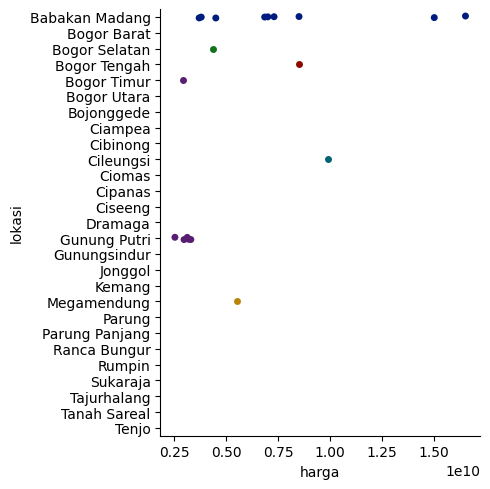

In [68]:
bogor2outlier = sns.catplot(x="harga", y="lokasi", data=bogor2_outlier, palette = "dark")

<ipython-input-69-327dbfa86aec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bogor2out = sns.catplot(x="harga", y="lokasi", data=bogor2_out, palette = "dark")


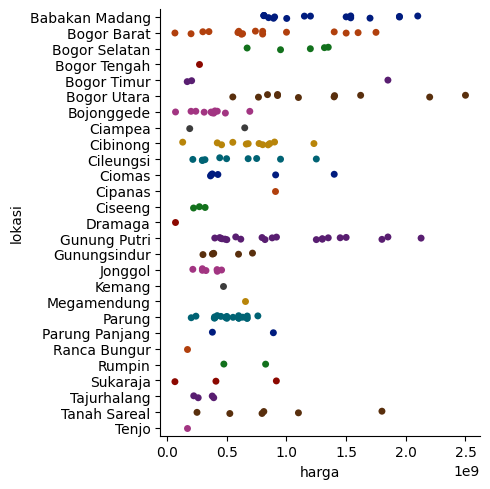

In [69]:
bogor2out = sns.catplot(x="harga", y="lokasi", data=bogor2_out, palette = "dark")

In [70]:
bogor2.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02
mean,143.575130,98.663212,2.694301,1.797927,0.155440,1.310881,2076.165803,1.289362e+09
std,191.576208,125.851746,1.110939,1.175087,0.485931,0.905271,1562.633932,2.115854e+09
min,30.000000,21.000000,1.000000,1.000000,0.000000,0.000000,900.000000,6.500000e+07
25%,66.000000,36.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,3.990000e+08
50%,84.000000,58.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,6.700000e+08
75%,120.000000,90.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,1.250000e+09
max,1500.000000,1200.000000,8.000000,6.000000,3.000000,8.000000,17600.000000,1.650000e+10


**4. Harga rumah di Depok**

<ipython-input-71-555c1223e983>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  hargalokasi_depok = sns.catplot(x="harga", y="lokasi", data=depok2, palette = "dark")


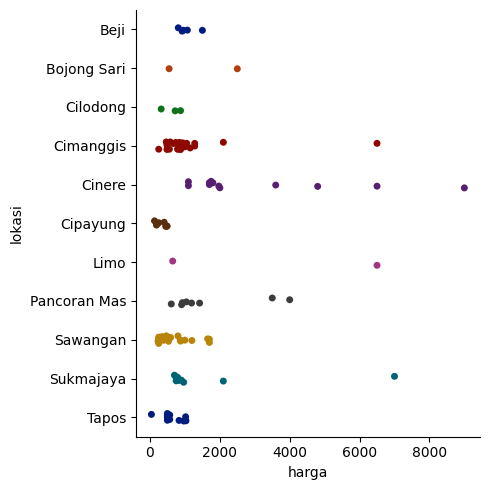

In [71]:
hargalokasi_depok = sns.catplot(x="harga", y="lokasi", data=depok2, palette = "dark")

In [72]:
Q1 = depok2["harga"].quantile(0.25)
Q2 = depok2["harga"].quantile(0.50)
Q3 = depok2["harga"].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.

no_outlier = (depok2["harga"] >= Q1 - 1.5 * IQR) & (depok2["harga"] <= Q3 + 1.5 *IQR)

# Creating DataFrame Without Outliers
depok2_out = depok2[no_outlier]
depok2_outlier = depok2[~no_outlier]

In [73]:
depok2_out

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
1,6-12-2021,50,45,2,1,0,0,Cipayung,SHM,1300,none,250,rumah minimalis termurah di citayam
2,6-12-2021,50,36,2,1,0,1,Sawangan,SHM,1300,Barat,250,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45,2,1,0,0,Cimanggis,SHM,1300,none,250,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45,2,1,0,1,Sawangan,SHM,1300,Timur,350,Rumah Cluster Siap Huni Depok
5,6-12-2021,40,30,2,1,0,0,Cipayung,SHM,1300,none,130,Promo akhir tahun rumah cantik dijual murah mu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115,2,1,1,1,Sukmajaya,SHM,0,none,750,Rumah di Depok Timur
114,4-12-2021,72,45,2,1,0,1,Cimanggis,SHM,0,none,1000,PERUMAHAN NUANSA PERMAI DEPOK
115,4-12-2021,40,40,2,1,0,0,Cipayung,SHM,1300,Timur,195,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50,2,1,0,0,Cipayung,SHM,1300,Selatan,185,rumah semi minimalis dua kamar siap huni di ci...


In [74]:
depok2_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,6-12-2021,165,200,4,2,0,1,Sukmajaya,SHM,2200,Selatan,2100,Rumah siap huni komplek Pelni
11,6-12-2021,210,250,4,4,1,1,Cimanggis,SHM,0,Utara,2100,RUMAH DALAM KOMPLEK BESAR. JLN LEBAR. DEPOK
23,5-12-2021,487,450,6,3,0,5,Pancoran Mas,SHM,2200,Utara,4000,Beli Rumah Bonus Ruko & Kontrakan di Pesona Ka...
24,5-12-2021,378,289,4,4,3,3,Sukmajaya,SHM,5500,Timur Laut,7000,Rumah Mewah di Pesona Khayangan Mungil Dekat U...
25,5-12-2021,400,226,5,4,2,1,Cinere,SHM,2200,Selatan,3600,Rumah Mewah Full Furnish Marmer di Megapolitan...
28,5-12-2021,1024,400,7,5,6,6,Limo,SHM,4400,none,6500,Rumah plus paviliun dengan taman luas selangka...
29,5-12-2021,1024,400,7,5,6,6,Cinere,SHM,5500,none,6500,Rumah Mewah Tanah Luas Siap Huni Lingkungan Se...
32,5-12-2021,151,180,3,3,1,1,Pancoran Mas,SHM,2200,Selatan,3500,Rumah 2 Lantai di Pesona Kayangan Margonda Depok
33,5-12-2021,885,600,7,4,2,2,Cimanggis,SHM,6600,none,6500,"Rumah luas tanah besar, kolam renang dan taman..."
38,5-12-2021,249,260,3,2,0,0,Bojong Sari,Lainnya,2200,none,2500,Rumah bagus daerah reni jaya depok


<ipython-input-75-2570c1a874a9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  depok2outlier = sns.catplot(x="harga", y="lokasi", data=depok2_outlier, palette = "dark")


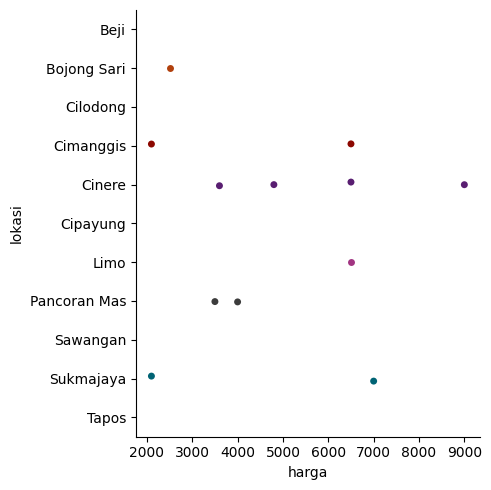

In [75]:
depok2outlier = sns.catplot(x="harga", y="lokasi", data=depok2_outlier, palette = "dark")

<ipython-input-76-0c6074725a62>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  depok2out = sns.catplot(x="harga", y="lokasi", data=depok2_out, palette = "dark")


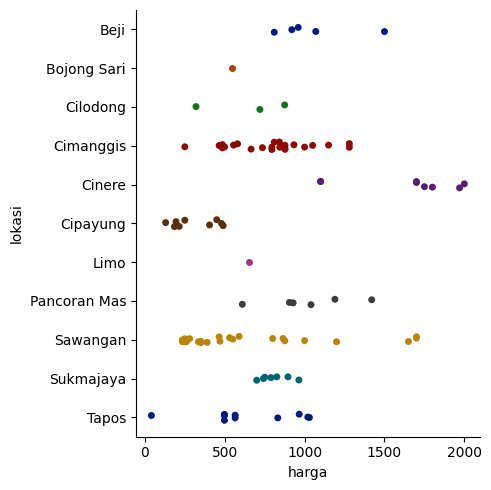

In [76]:
depok2out = sns.catplot(x="harga", y="lokasi", data=depok2_out, palette = "dark")

In [77]:
depok2.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,122.357143,94.026786,2.750000,1.919643,0.392857,1.383929,1955.357143,1209.696429
std,175.508623,94.614196,1.044074,0.959902,0.980505,1.156615,1275.962049,1505.378482
min,36.000000,15.000000,2.000000,1.000000,0.000000,0.000000,0.000000,41.000000
25%,60.000000,46.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,485.000000
50%,72.000000,61.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,810.000000
75%,100.000000,100.750000,3.000000,2.000000,0.000000,2.000000,2200.000000,1112.500000
max,1024.000000,600.000000,7.000000,5.000000,6.000000,7.000000,10000.000000,9000.000000


**5. Harga rumah di Tangerang**

<ipython-input-78-3197d05920ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  hargalokasi_tangerang = sns.catplot(x="harga", y="lokasi", data=tangerang2, palette = "dark")


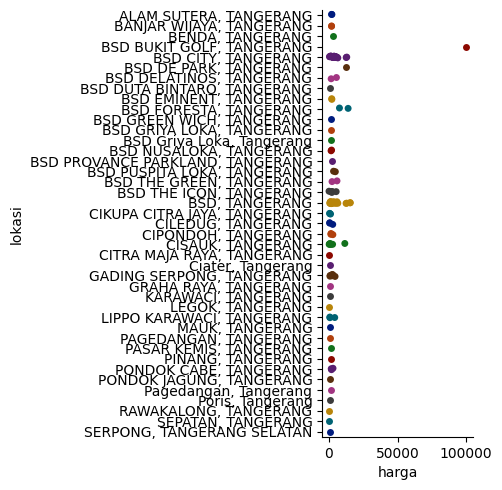

In [78]:
hargalokasi_tangerang = sns.catplot(x="harga", y="lokasi", data=tangerang2, palette = "dark")

In [79]:
Q1 = tangerang2["harga"].quantile(0.25)
Q2 = tangerang2["harga"].quantile(0.50)
Q3 = tangerang2["harga"].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.

no_outlier = (tangerang2["harga"] >= Q1 - 1.5 * IQR) & (tangerang2["harga"] <= Q3 + 1.5 *IQR)

# Creating DataFrame Without Outliers
tangerang2_out = tangerang2[no_outlier]
tangerang2_outlier = tangerang2[~no_outlier]

In [80]:
tangerang2_outlier

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
20,12-06-2021,276,441,4,4,2,2,"BSD CITY, TANGERANG",none,11000,Timur Laut,13000,Miliki Hunian Eksklusif dengan akses langsung ...
32,12-06-2021,534,1000,5,6,6,2,"BSD, TANGERANG",SHM,16500,none,15500,"New Home\nRUMAH MEWAH TAMAN TIRTA GOLF BSD, Lt..."
47,12-06-2021,625,500,5,3,0,2,"BSD, TANGERANG",SHM,5500,none,12500,"Di Jual Rumah di Bsd, Aman dan Nyaman, Komplek..."
49,12-06-2021,534,1000,8,8,6,6,"BSD, TANGERANG",SHM,16500,none,15500,Dijual rumah brand new TAMAN TIRTA GOLF BSD\nL...
54,12-06-2021,474,500,6,5,4,2,"BSD DE PARK, TANGERANG",SHM,23000,Utara,12500,"LT 474, LB +/- 500 (full renovated), KT 6+2, K..."
66,12-06-2021,276,441,4,4,0,0,"BSD FORESTA, TANGERANG",SHM,0,none,14000,LAUREL NAVA PARK by HONGKONG LAND & SINARMAS L...
67,12-06-2021,276,441,5,5,0,0,"BSD CITY, TANGERANG",HGB,3500,none,12600,"Rumah Dijual Tangerang , Hot, rumah sultan ter..."
76,12-06-2021,230,370,4,4,0,0,"CISAUK, TANGERANG",HGB,3500,none,11600,LOKASI LAUREL SANGAT STRATEGIS SELANGKAH KE BO...
100,12-06-2021,3087,2500,5,5,10,10,"BSD BUKIT GOLF, TANGERANG",none,66000,none,100000,Rumah Super Mewah Bukit Golf BSD City rumah me...
114,12-08-2021,276,441,4,4,4,4,"BSD, TANGERANG",SHM,11000,none,13000,LAUREL NAVAPARK @ BSD City Tangerang Phase2. D...


In [81]:
tangerang2_out

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,12-06-2021,60,50,3,2,0,0,"BSD CITY, TANGERANG",SHM,1300,Selatan,500,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72,54,2,1,1,1,"CISAUK, TANGERANG",SHM,1300,none,480,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60,48,3,2,2,2,"CILEDUG, TANGERANG",SHM,2200,none,600,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200,225,5,4,0,0,"LIPPO KARAWACI, TANGERANG",SHM,5500,none,4250,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76,123,3,3,0,2,"PONDOK CABE, TANGERANG",SHM,2200,none,1700,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60,55,2,2,0,1,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200,none,711,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66,70,3,2,0,1,"Ciater, Tangerang",SHM,1300,none,850,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202,85,4,3,1,1,"BSD Griya Loka, Tangerang",SHM,2200,Barat,1860,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108,130,3,3,1,1,"Pagedangan, Tangerang",SHM,2200,none,1800,"Fasilitas Terdekat :Lokasi strategis, berada d..."


<ipython-input-82-4a8622fe090e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  tangerang2outlier = sns.catplot(x="harga", y="lokasi", data=tangerang2_outlier, palette = "dark")


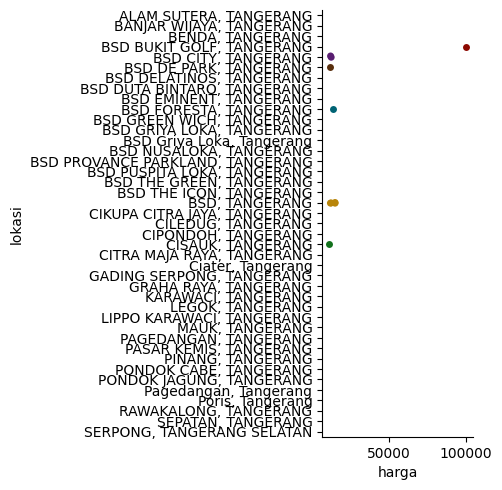

In [82]:
tangerang2outlier = sns.catplot(x="harga", y="lokasi", data=tangerang2_outlier, palette = "dark")

<ipython-input-83-54e18cfbd1c6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  tangerang2out = sns.catplot(x="harga", y="lokasi", data=tangerang2_out, palette = "dark")


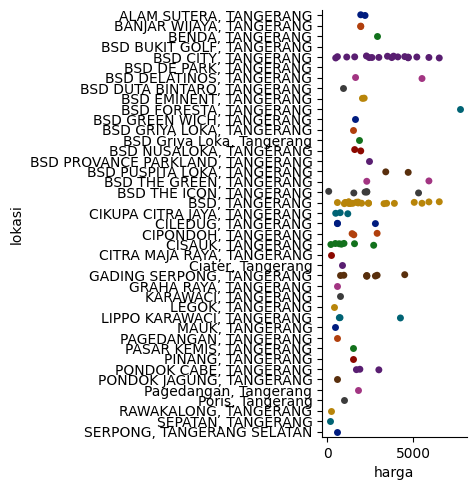

In [83]:
tangerang2out = sns.catplot(x="harga", y="lokasi", data=tangerang2_out, palette = "dark")

In [84]:
tangerang2.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,202.653226,199.491935,3.346774,2.693548,0.677419,1.193548,3546.774194,3849.556452
std,285.219301,264.097681,1.097257,1.295253,1.445759,1.266693,6505.825226,9316.413817
min,37.000000,27.000000,2.000000,1.000000,0.000000,0.000000,0.000000,95.000000
25%,90.000000,81.500000,3.000000,2.000000,0.000000,0.000000,2200.000000,1037.500000
50%,150.500000,125.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,1950.000000
75%,250.000000,240.000000,4.000000,3.000000,1.000000,2.000000,3500.000000,3775.000000
max,3087.000000,2500.000000,8.000000,8.000000,10.000000,10.000000,66000.000000,100000.000000


**HISTOGRAM JAKARTA**

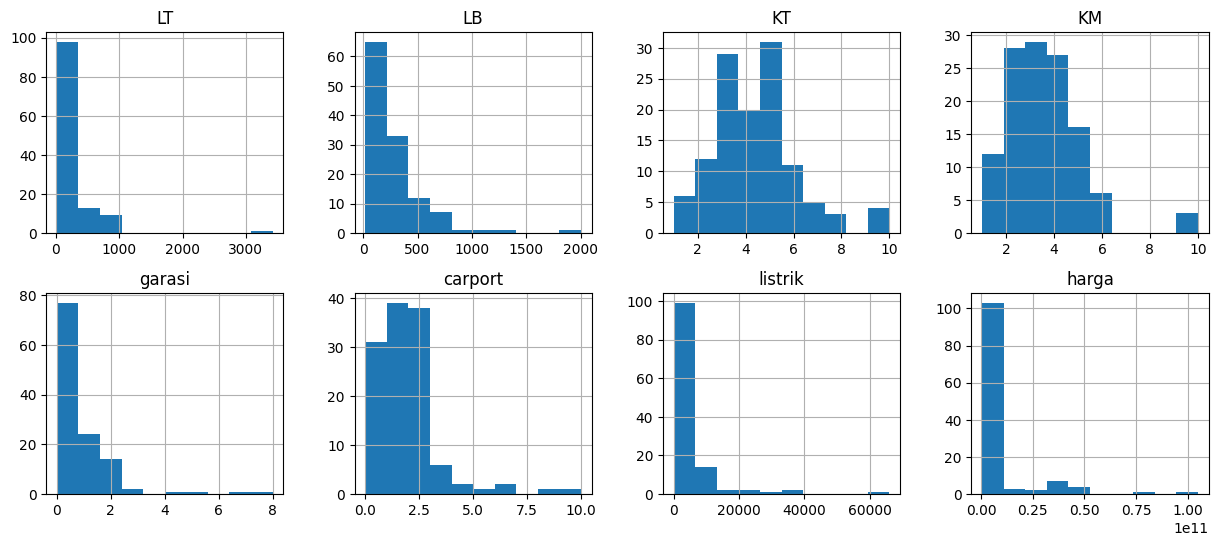

In [85]:
numericaljakarta = jakarta2.select_dtypes(include = ['int',]).columns
jakarta2[numericaljakarta].hist(figsize=(15, 6), layout=(2, 4));

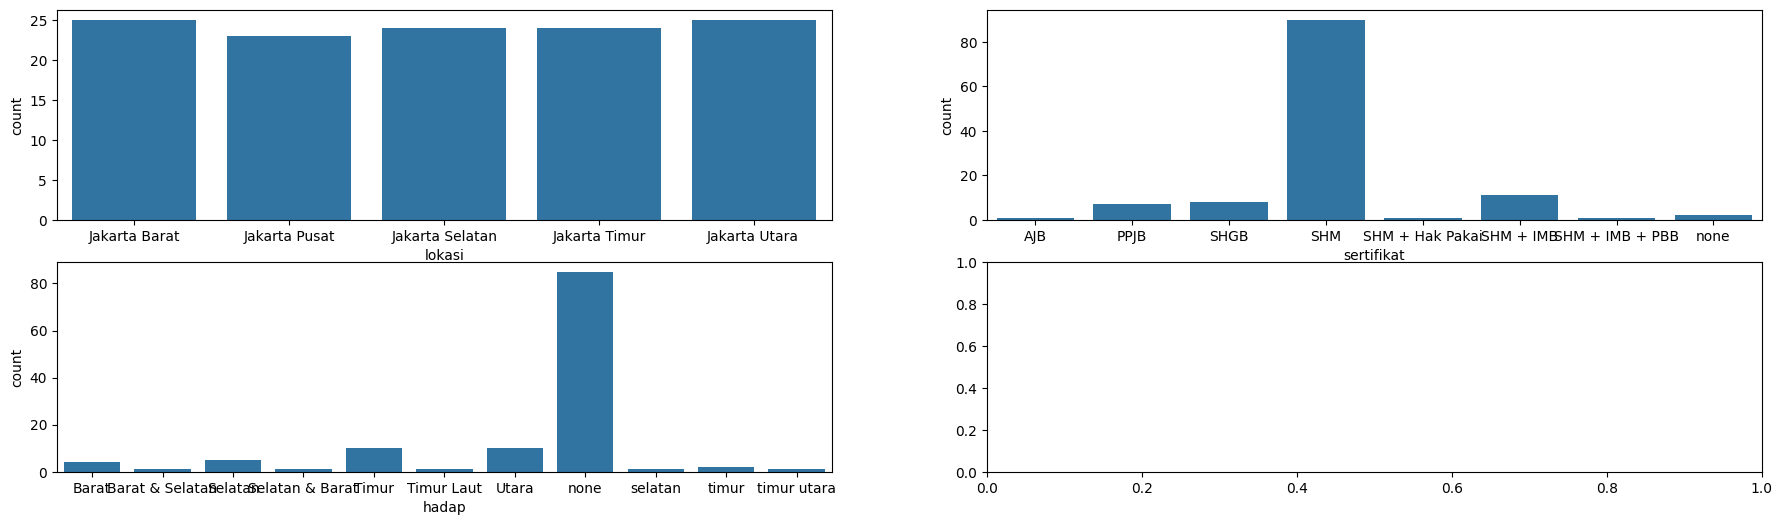

In [86]:
categoricaljakarta = jakarta2.select_dtypes(include = ['category']).columns

fig, ax = plt.subplots(2, 2, figsize=(22, 6))
for variable, subplot in zip(categoricaljakarta, ax.flatten()):
    sns.countplot(jakarta2, x=variable, ax=subplot)

**HISTOGRAM BEKASI**

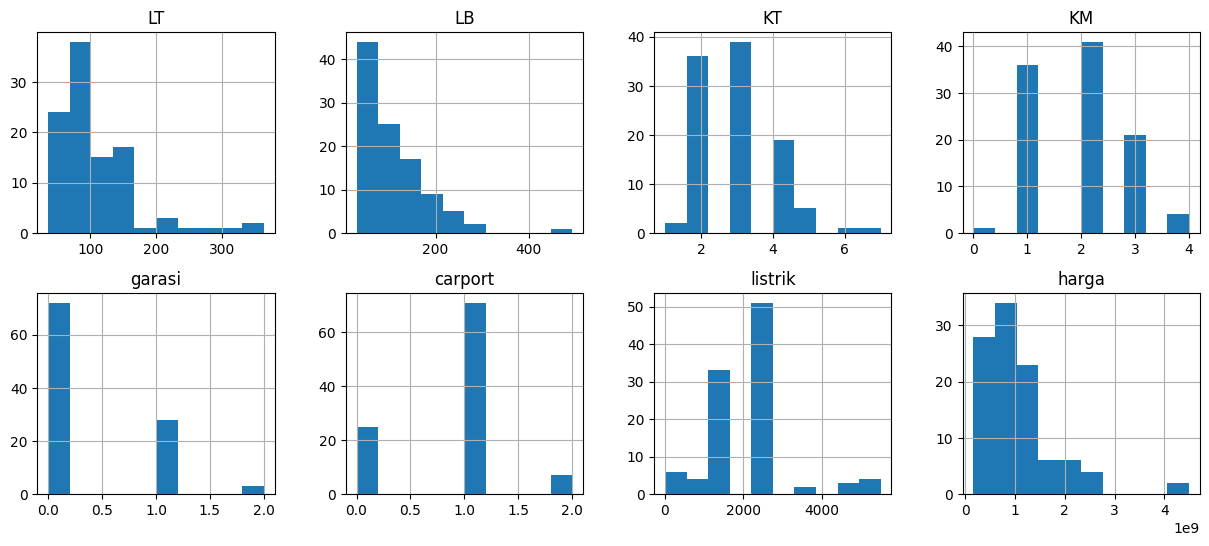

In [87]:
numericalbekasi = bekasi2.select_dtypes(include = ['int',]).columns
bekasi2[numericalbekasi].hist(figsize=(15, 6), layout=(2, 4));

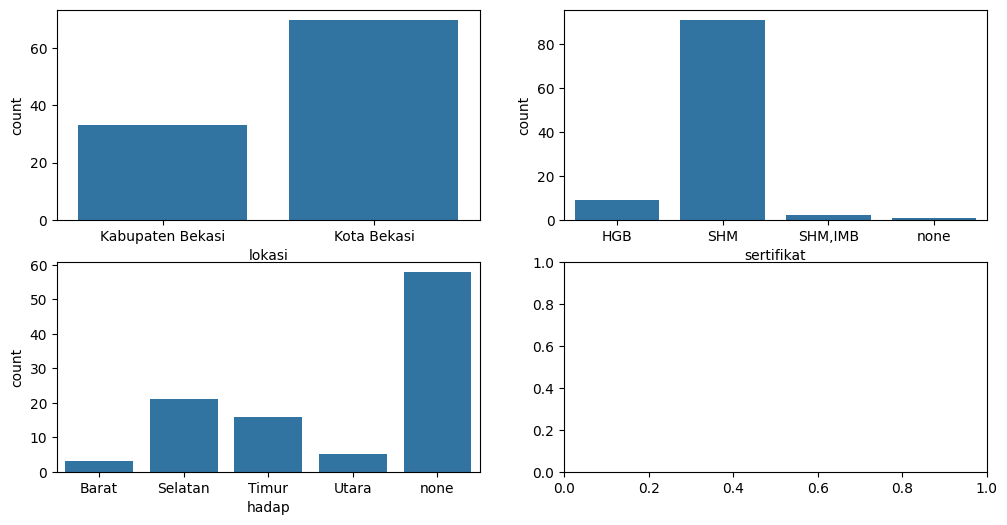

In [88]:
categoricalbekasi = bekasi2.select_dtypes(include = ['category']).columns

fig, ax = plt.subplots(2, 2, figsize=(12, 6))
for variable, subplot in zip(categoricalbekasi, ax.flatten()):
    sns.countplot(bekasi2, x=variable, ax=subplot)

**HISTOGRAM BOGOR**

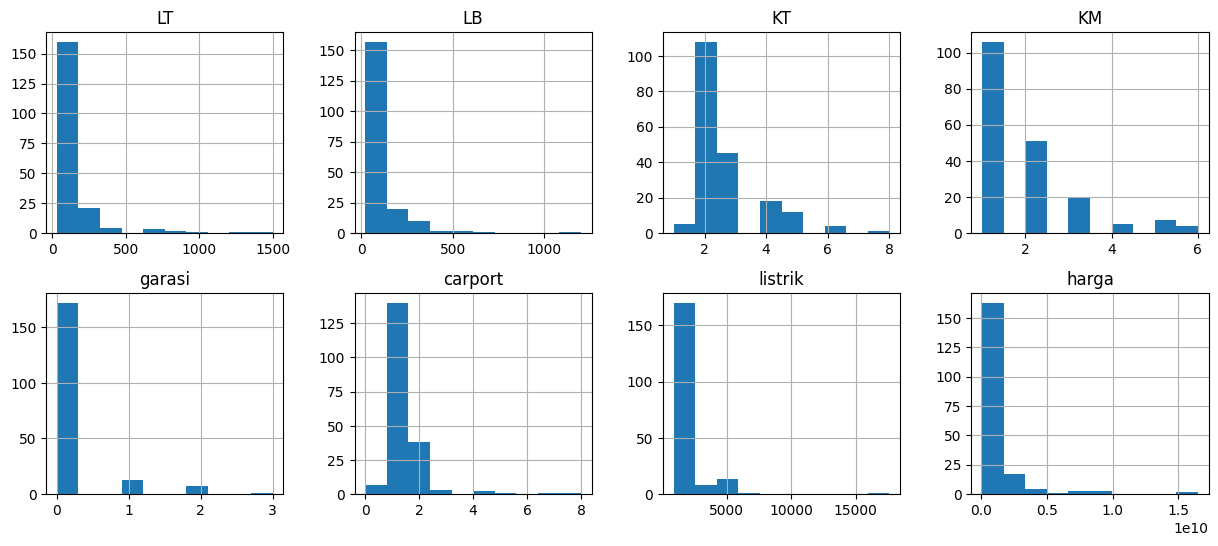

In [89]:
numericalbogor = bogor2.select_dtypes(include = ['int',]).columns
bogor2[numericalbogor].hist(figsize=(15, 6), layout=(2, 4));

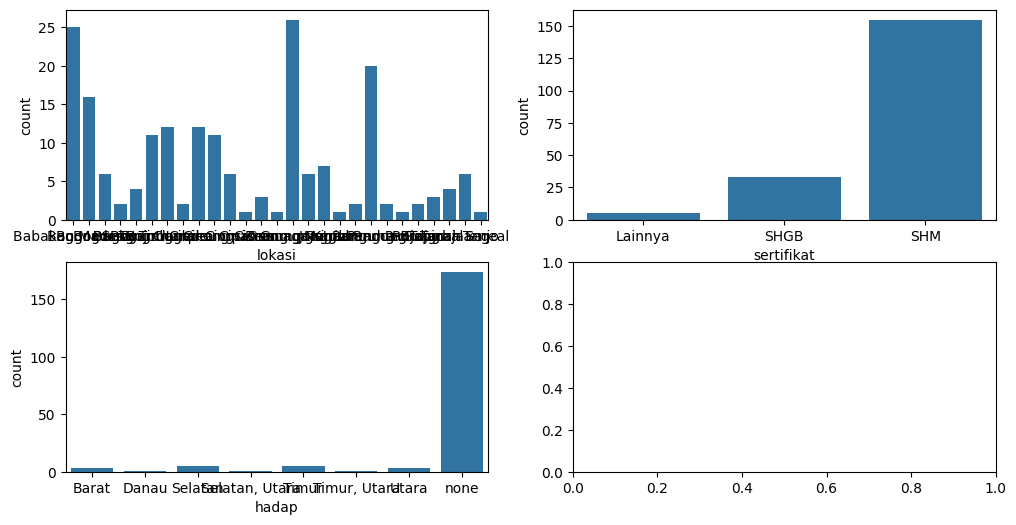

In [90]:
categoricalbogor = bogor2.select_dtypes(include = ['category']).columns

fig, ax = plt.subplots(2, 2, figsize=(12, 6))
for variable, subplot in zip(categoricalbogor, ax.flatten()):
    sns.countplot(bogor2, x=variable, ax=subplot)

**HISTOGRAM DEPOK**

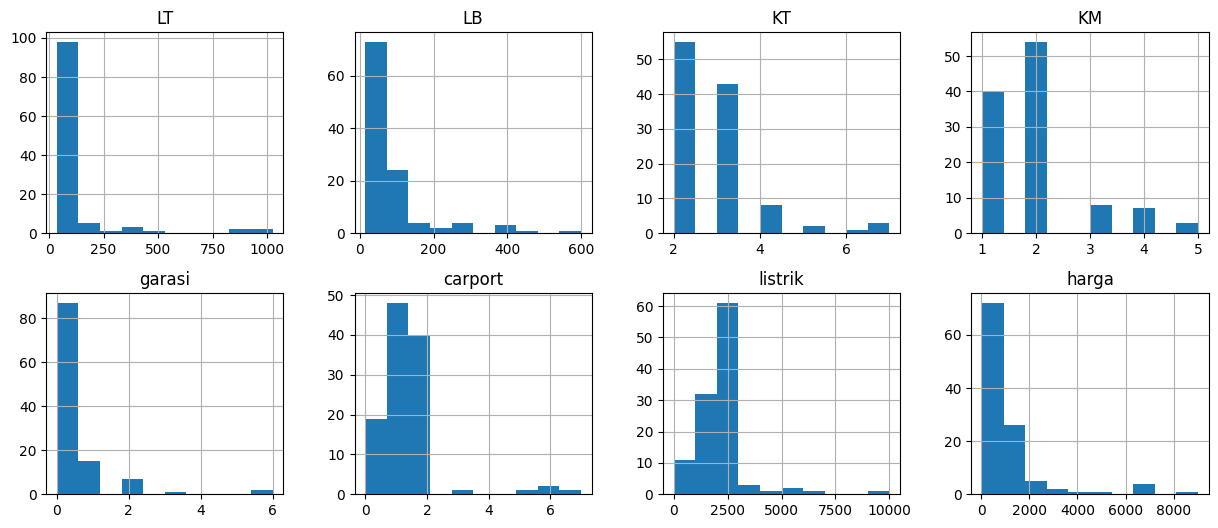

In [91]:
numericaldepok = depok2.select_dtypes(include = ['int',]).columns
depok2[numericaldepok].hist(figsize=(15, 6), layout=(2, 4));

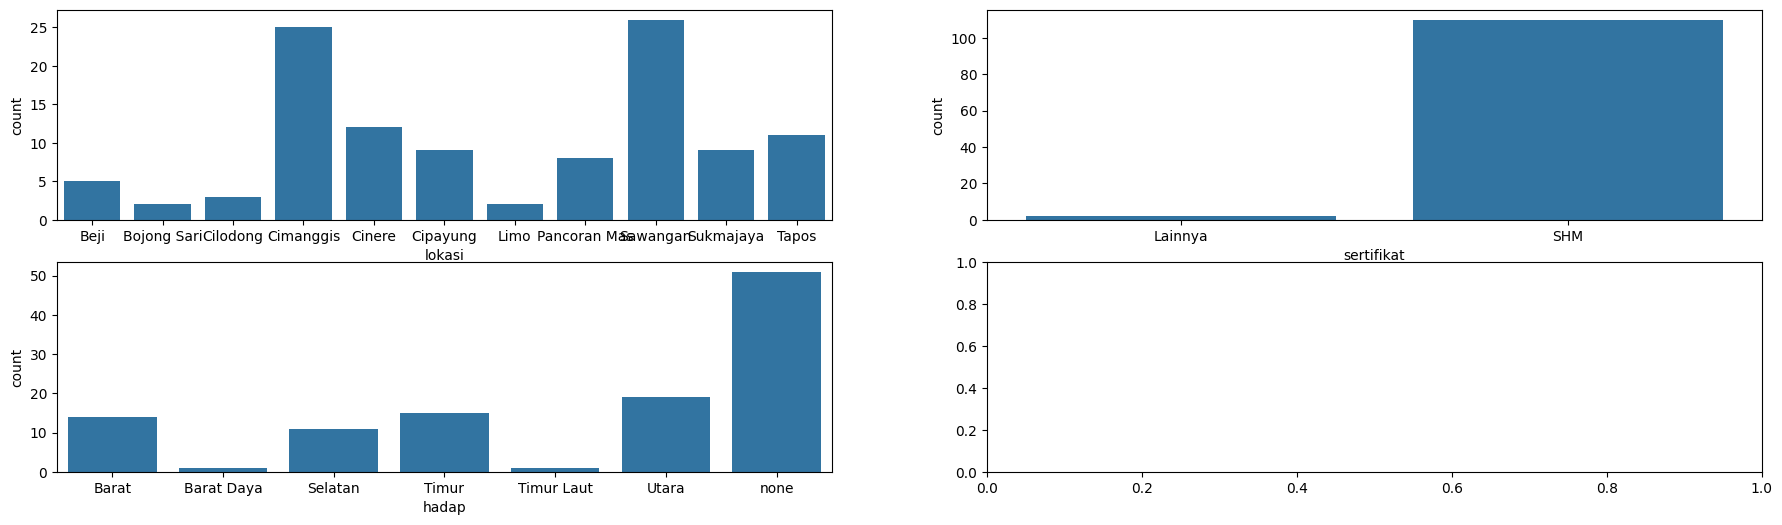

In [92]:
categoricaldepok = depok2.select_dtypes(include = ['category']).columns

fig, ax = plt.subplots(2, 2, figsize=(22, 6))
for variable, subplot in zip(categoricaldepok, ax.flatten()):
    sns.countplot(depok2, x=variable, ax=subplot)

**HISTOGRAM TANGERANG**

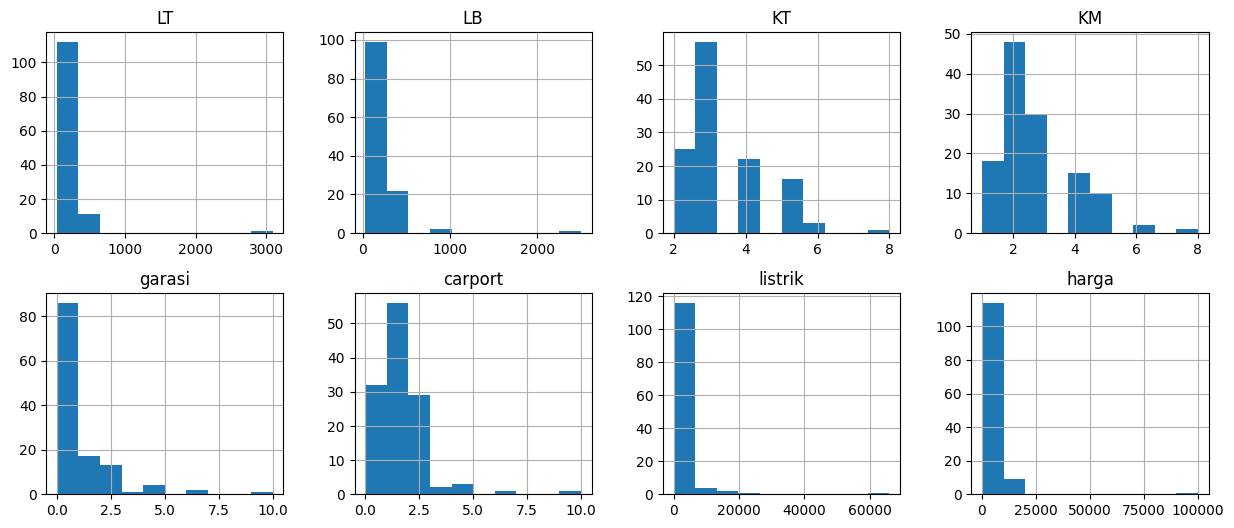

In [93]:
numericaltgr = tangerang2.select_dtypes(include = ['int',]).columns
tangerang2[numericaltgr].hist(figsize=(15, 6), layout=(2, 4));

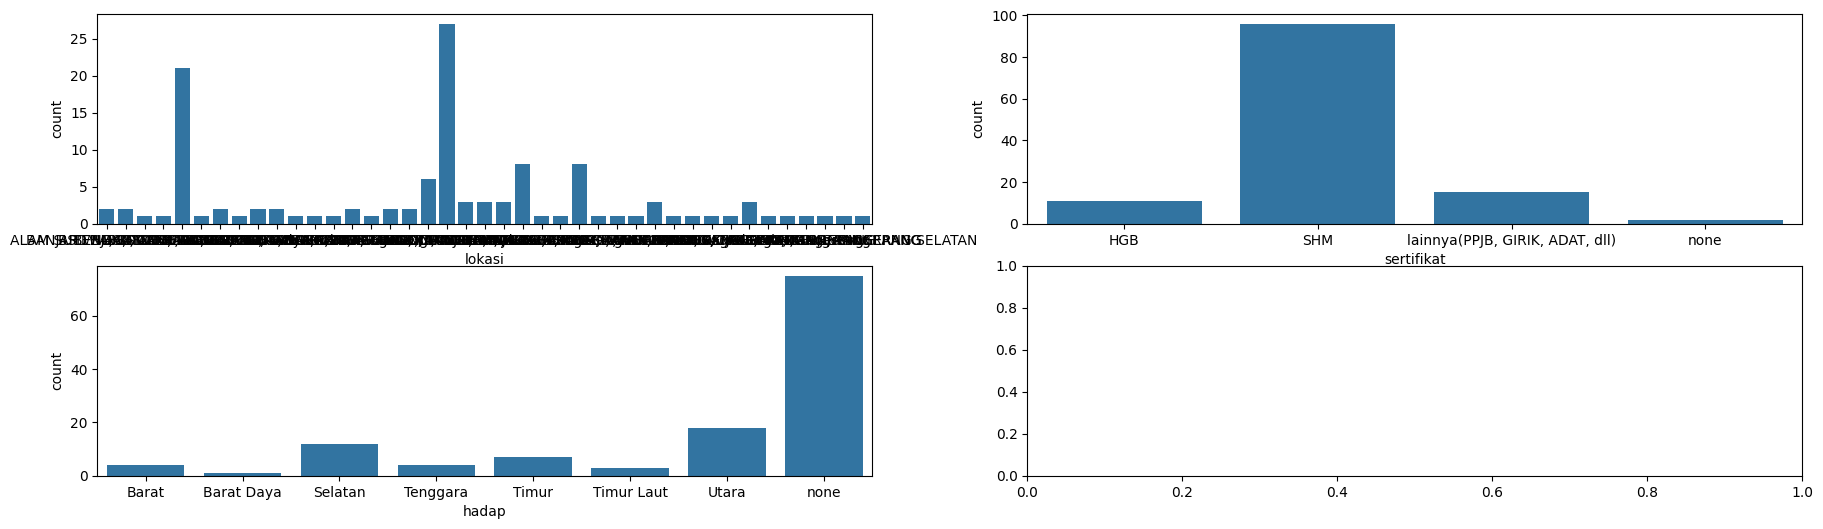

In [94]:
categoricaltangerang = tangerang2.select_dtypes(include = ['category']).columns

fig, ax = plt.subplots(2, 2, figsize=(22, 6))
for variable, subplot in zip(categoricaltangerang, ax.flatten()):
    sns.countplot(tangerang2, x=variable, ax=subplot)

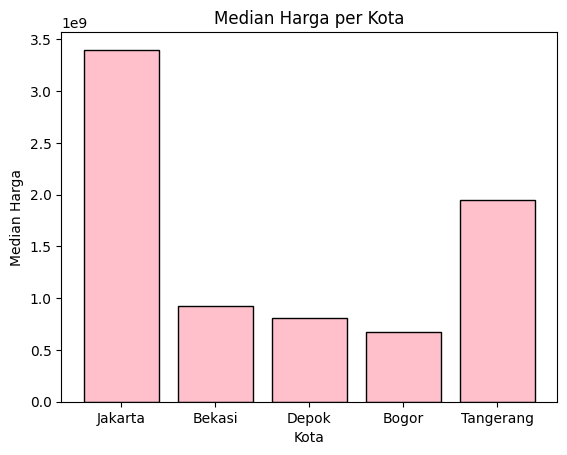

In [95]:
kota = ['Jakarta', 'Bekasi', 'Depok', 'Bogor', 'Tangerang']
harga = [3400000000, 920000000, 810000000, 670000000, 1950000000]

# Membuat DataFrame
dfmean = pd.DataFrame({'kota': kota, 'harga': harga})

# Membuat bar plot
plt.bar(dfmean['kota'], dfmean['harga'], color='pink', edgecolor='black')

# Menambahkan label sumbu X, sumbu Y, dan judul
plt.xlabel('Kota')
plt.ylabel('Median Harga')
plt.title('Median Harga per Kota')

# Menampilkan plot
plt.show()

**Interpretasi**

Berdasarkan grafik median harga per kota, kita bisa melihat bahwa  rumah yang di kota Jakarta cenderung lebih mahal, sedangakan rumah yang berada di daerah Tangerang cenderung berada di tengah karena tidak cenderung mahal seperti Jakarta tetapi tidak juga cenderung murah seperti Bekasi, Kota Depok, dan juga Bogor.

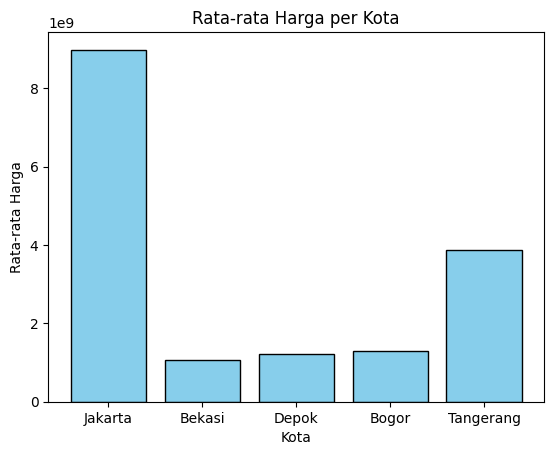

In [96]:
kota = ['Jakarta', 'Bekasi', 'Depok', 'Bogor', 'Tangerang']
harga = [8985955000, 1070933000, 1220440367, 1292920000, 3878237705]

# Membuat DataFrame
dfmean = pd.DataFrame({'kota': kota, 'harga': harga})

# Membuat bar plot
plt.bar(dfmean['kota'], dfmean['harga'], color='skyblue', edgecolor='black')

# Menambahkan label sumbu X, sumbu Y, dan judul
plt.xlabel('Kota')
plt.ylabel('Rata-rata Harga')
plt.title('Rata-rata Harga per Kota')

# Menampilkan plot
plt.show()

**Interpretasi**
  
  Berdasarkan grafik data rata-rata harga per kota, bisa dilihat bahwa rata-rata harga tertinggi ada pada kota Jakarta dan yang terendah berada di kota Bekasi. Tetapi, seperti yang kita ketahui Jakarta merupakan salah satu pusat perekonomian di Jabodetabek, dengan alasan itu kami menyarankan kepada RPPI untuk membuka cabang berikutnya di kota Depok. Karena rata-rata harga di kota Depok yang tidak jauh berbeda dengan harga terendahnya, sehingga depok sangat cocok untuk masyarakat kelas meengah, serta jarak dari Depok menuju Jakarta yang merupakan pusat perekonomian lebih dekat dibandingakan dengan kota-kota lainnya, hal itu menjadikan kota Depok adalah kota strategis untuk membuka kantor cabang.

In [97]:
result = pd.concat([jakarta2, bekasi2, depok2, tangerang2, bogor2], axis=0)
df = pd.DataFrame(result)
df

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,06-12-2021,202,198,8,3,0,0,Jakarta Pusat,SHM,2200,none,4500000000,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30,55,2,1,0,1,Jakarta Pusat,SHM,2200,none,1100000000,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,none,395000000,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33,42,2,2,0,1,Jakarta Pusat,SHM,2200,none,835000000,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30,55,2,2,0,1,Jakarta Pusat,SHM,2200,none,1100000000,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,03-12-2021,90,36,2,1,0,1,Gunung Putri,SHM,1300,none,440550000,"Dekat taman buah mekarsari, dekat rumah sakit"
189,03-12-2021,107,31,2,1,0,1,Sukaraja,SHM,1300,none,408650000,Rumah siap huni
190,03-12-2021,210,150,4,2,1,1,Bogor Selatan,SHM,2200,none,1200000000,Cuma 10 menit ke kota
191,03-12-2021,90,36,2,1,0,1,Cileungsi,SHM,1300,none,440550000,"Dekat rumah sakit, dekat pasar"


In [98]:
df.reset_index(drop=True, inplace=True)

In [99]:
df

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
0,06-12-2021,202,198,8,3,0,0,Jakarta Pusat,SHM,2200,none,4500000000,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30,55,2,1,0,1,Jakarta Pusat,SHM,2200,none,1100000000,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,none,395000000,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33,42,2,2,0,1,Jakarta Pusat,SHM,2200,none,835000000,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30,55,2,2,0,1,Jakarta Pusat,SHM,2200,none,1100000000,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,03-12-2021,90,36,2,1,0,1,Gunung Putri,SHM,1300,none,440550000,"Dekat taman buah mekarsari, dekat rumah sakit"
649,03-12-2021,107,31,2,1,0,1,Sukaraja,SHM,1300,none,408650000,Rumah siap huni
650,03-12-2021,210,150,4,2,1,1,Bogor Selatan,SHM,2200,none,1200000000,Cuma 10 menit ke kota
651,03-12-2021,90,36,2,1,0,1,Cileungsi,SHM,1300,none,440550000,"Dekat rumah sakit, dekat pasar"


In [100]:
df['harga'] = df['harga'].apply(lambda x: x * 1000000 if x < 1100000 else x)

In [101]:
df.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,6.530000e+02
mean,164.932619,152.192956,3.162328,2.300153,0.419602,1.251149,2926.799387,3.153575e+09
std,243.743205,200.687017,1.393892,1.379723,1.009942,1.135600,4721.160597,8.562945e+09
min,16.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.100000e+07
25%,70.000000,50.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,5.650000e+08
50%,94.000000,83.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,1.020000e+09
75%,162.000000,180.000000,4.000000,3.000000,0.000000,2.000000,2200.000000,2.300000e+09
max,3422.000000,2500.000000,10.000000,10.000000,10.000000,10.000000,66000.000000,1.050000e+11


In [102]:
for column in df.columns:
    print(f"Modus untuk kolom '{column}': {df[column].mode()[0]}")


Modus untuk kolom 'created_at': 06-12-2021
Modus untuk kolom 'LT': 60
Modus untuk kolom 'LB': 36
Modus untuk kolom 'KT': 2
Modus untuk kolom 'KM': 2
Modus untuk kolom 'garasi': 0
Modus untuk kolom 'carport': 1
Modus untuk kolom 'lokasi': Kota Bekasi
Modus untuk kolom 'sertifikat': SHM
Modus untuk kolom 'listrik': 2200
Modus untuk kolom 'hadap': none
Modus untuk kolom 'harga': 600000000
Modus untuk kolom 'deskripsi': Dekat dengan berbagai fasilitas seperti :
Sekolah Negeri dan Swasta, Kampus, Tempat ibadah, Rumah sakit, Pusat perbelanjaan, Stasiun, Pintu tol
More info :
0821 3494 3xxx RN
0821 1238 5xxx LH


**Interpretasi**

Terlihat dari tabel bahwa karakteristik yang paling banyak dijual adalah LT: 60, LB: 36, KT: 2, KM: 2, garasi: 0, carport: 1, lokasi: Kota Bekasi, sertifikat: SHM, listrik: 2200, dan harga: 600000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  653 non-null    object
 1   LT          653 non-null    int64 
 2   LB          653 non-null    int64 
 3   KT          653 non-null    int64 
 4   KM          653 non-null    int64 
 5   garasi      653 non-null    int64 
 6   carport     653 non-null    int64 
 7   lokasi      653 non-null    object
 8   sertifikat  653 non-null    object
 9   listrik     653 non-null    int64 
 10  hadap       653 non-null    object
 11  harga       653 non-null    int64 
 12  deskripsi   644 non-null    object
dtypes: int64(8), object(5)
memory usage: 66.4+ KB


In [104]:
filtered_df = df[
    (df['LT'] >= 100) &
    (df['LB'] >= 100) &
    (df['KT'] >= 3) &
    (df['KM'] >= 2) &
    (df['garasi'] >= 1) &
    (df['listrik'] >= 2200) &
    (df['harga'] <= 2000000000)
]
filtered_df

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
80,07-12-2021,162,140,4,4,1,1,Jakarta Utara,PPJB,2200,Selatan,1500000000,- Rumah baru desain minimalis di cluster Norfo...
126,08-12-2021,160,230,4,4,1,0,Kabupaten Bekasi,SHM,5500,Selatan,1850000000,(Harapan Indah) Cluster Aralia Perumahan Kota ...
153,06-12-2021,153,180,5,4,1,1,Kabupaten Bekasi,SHM,4400,none,1300000000,"Di lelang Tidak Bergerak, Tanah berikut bangun..."
166,05-12-2021,112,120,3,2,1,1,Kabupaten Bekasi,SHM,2200,Selatan,1100000000,Dijual rumah 2 lantai siap huni dalam cluster ...
177,04-12-2021,150,145,3,2,2,2,Kota Bekasi,SHM,3300,none,750000000,"FASILITAS:, Satpam komplek, Lingkungan bebas b..."
208,02-12-2021,135,110,3,3,1,1,Kota Bekasi,SHM,2200,Selatan,1200000000,"Di Jual Rumah Murah di Jaka sampurna Bekasi ,l..."
212,02-12-2021,105,130,3,3,1,1,Kota Bekasi,SHM,2200,Selatan,1200000000,Dijual cepat Rumah cantik rapih siap huni di b...
238,6-12-2021,200,150,3,2,1,1,Cinere,SHM,2200,none,2000000000,"BEBAS BANJIR SEPANJANG MASA, BUKIT CINERE INDA..."
250,5-12-2021,100,130,4,5,2,1,Cinere,SHM,2200,none,1700000000,Rumah Baru 2 Lantai Dalam Komplek Akses 2 Mobi...
255,5-12-2021,100,130,4,4,2,2,Cinere,SHM,2200,none,1700000000,Rumah baru 2 Lantai siap huni dalam komplek ci...


In [105]:
filtered_df = df[
    (df['LT'] >= 100) &
    (df['LB'] >= 100) &
    (df['KT'] >= 3) &
    (df['KM'] >= 2) &
    (df['garasi'] >= 1) &
    (df['listrik'] >= 2200) &
    (df['harga'] <= 2000000000)
]
filtered_df

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,deskripsi
80,07-12-2021,162,140,4,4,1,1,Jakarta Utara,PPJB,2200,Selatan,1500000000,- Rumah baru desain minimalis di cluster Norfo...
126,08-12-2021,160,230,4,4,1,0,Kabupaten Bekasi,SHM,5500,Selatan,1850000000,(Harapan Indah) Cluster Aralia Perumahan Kota ...
153,06-12-2021,153,180,5,4,1,1,Kabupaten Bekasi,SHM,4400,none,1300000000,"Di lelang Tidak Bergerak, Tanah berikut bangun..."
166,05-12-2021,112,120,3,2,1,1,Kabupaten Bekasi,SHM,2200,Selatan,1100000000,Dijual rumah 2 lantai siap huni dalam cluster ...
177,04-12-2021,150,145,3,2,2,2,Kota Bekasi,SHM,3300,none,750000000,"FASILITAS:, Satpam komplek, Lingkungan bebas b..."
208,02-12-2021,135,110,3,3,1,1,Kota Bekasi,SHM,2200,Selatan,1200000000,"Di Jual Rumah Murah di Jaka sampurna Bekasi ,l..."
212,02-12-2021,105,130,3,3,1,1,Kota Bekasi,SHM,2200,Selatan,1200000000,Dijual cepat Rumah cantik rapih siap huni di b...
238,6-12-2021,200,150,3,2,1,1,Cinere,SHM,2200,none,2000000000,"BEBAS BANJIR SEPANJANG MASA, BUKIT CINERE INDA..."
250,5-12-2021,100,130,4,5,2,1,Cinere,SHM,2200,none,1700000000,Rumah Baru 2 Lantai Dalam Komplek Akses 2 Mobi...
255,5-12-2021,100,130,4,4,2,2,Cinere,SHM,2200,none,1700000000,Rumah baru 2 Lantai siap huni dalam komplek ci...


**Interpretasi**

Rumah rumah ini merupakan rumah yang cocok untuk diinvestasikan dengan LT dan LB 100m² atau lebih itu rumah yang untuk keluarga di Indonesia disertai dengan minimal 3KM, 2KT, 1 garasi dan daya listrik 2200 dan harga kurang dari rata rata harga yang dijual. Namun disini terdapat 2 rumah yang tidak direkomendasikan yaitu yang memiliki sertifikat PPJB yang dimana itu sangat berisiko karena itu hanya perjanjian jual beli dan ini merupakan sertifikat yang sangat lemah, lalu yang kedua yang memiliki surat shgb juga tidak direkomendasikan karna harga dan LT serta LB nya berbanding jauh ditambah sertifikat yang SHGB itu sangat tidak cocok untuk investasi janka panjang dan tempat tinggal permanen

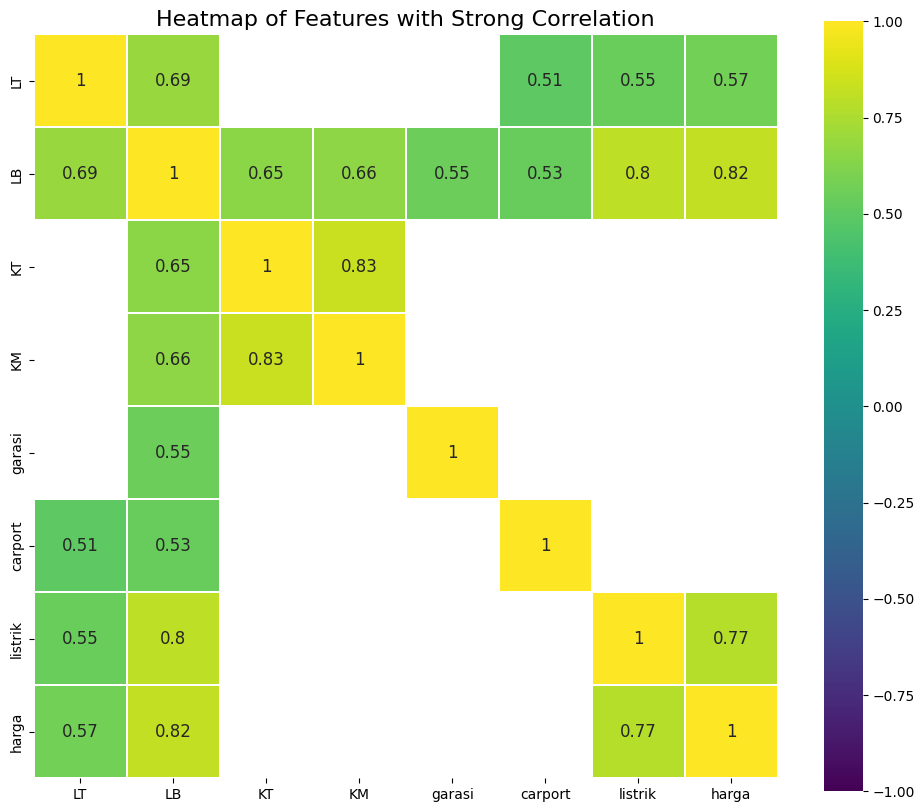

In [106]:
# Seleksi kolom numerik dari dataframe yang sudah difilter
numerical = df.select_dtypes(include=[np.number]).columns

# Hitung korelasi antara kolom numerik
corr2 = df[numerical].corr()

# Membuat heatmap dengan hanya menampilkan korelasi >= 0.5 atau <= -0.5
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True)

# Memberi judul pada heatmap
plt.title('Heatmap of Features with Strong Correlation', fontsize=16)

# Menampilkan heatmap
plt.show()

**Interpretasi**

1. Hubungan Luas Tanah dan Luas Bangunan dengan harga
  - Korelasi antara LT dan harga adalah 0.57, yang menunjukkan hubungan positif sedang. Artinya, semakin luas tanah, harga properti cenderung meningkat, tetapi pengaruhnya tidak terlalu kuat.
  - Korelasi antara LB dan harga sangat kuat, dengan nilai 0.82. Ini berarti ukuran bangunan memiliki pengaruh besar terhadap harga properti. Jadi, properti dengan luas bangunan yang lebih besar cenderung memiliki harga yang lebih tinggi.

2. Kamar Tidur (KT) dan Kamar Mandi (KM):
  - KT (kamar tidur) memiliki korelasi kuat dengan KM (kamar mandi) sebesar 0.83, yang masuk akal karena rumah dengan lebih banyak kamar tidur cenderung memiliki lebih banyak kamar mandi.
  - Korelasi kamar tidur dengan harga 0.65 dan kamar mandi dengan harga 0.66 menunjukkan bahwa jumlah kamar juga merupakan faktor penting dalam menentukan harga properti.

3. Listrik memiliki korelasi yang cukup kuat dengan harga sebesar 0.77. Ini menunjukkan bahwa daya listrik yang tersedia adalah faktor yang cukup penting dalam menentukan harga properti. Semakin besar kapasitas listrik, semakin tinggi harga properti

4. Garasi dan Carport memiliki korelasi yang lebih rendah terhadap harga (masing-masing sekitar 0.55 untuk garasi dan 0.51 untuk carport). Ini menunjukkan bahwa meskipun adanya fasilitas seperti garasi dan carport dapat menambah nilai properti, pengaruhnya terhadap harga tidak sebesar faktor lain seperti luas bangunan dan jumlah kamar.

5. Terdapat korelasi tinggi antara listrik dan LB (0.80), yang berarti properti dengan luas bangunan lebih besar cenderung memiliki daya listrik lebih tinggi. Hal ini bisa jadi faktor penting untuk properti premium atau mewah yang membutuhkan daya listrik besar.

Berdasarkan analisis korelasi ini, beberapa faktor kunci yang sangat berpengaruh terhadap harga properti adalah:
  - Luas bangunan (LB)
  - Jumlah kamar (KT dan KM)
  - Kapasitas listrik.


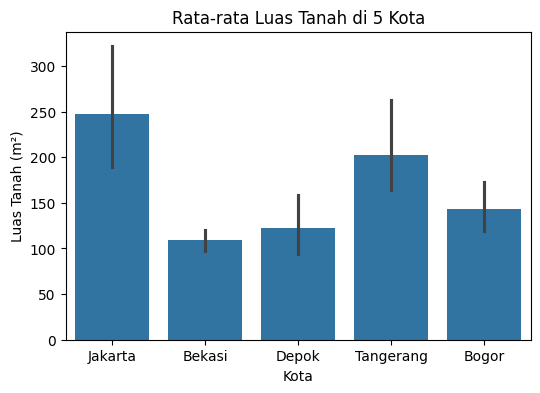

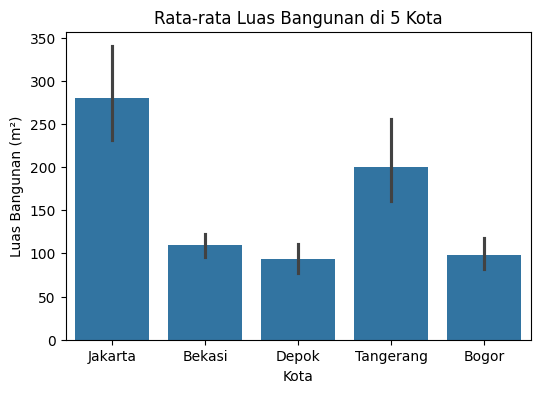

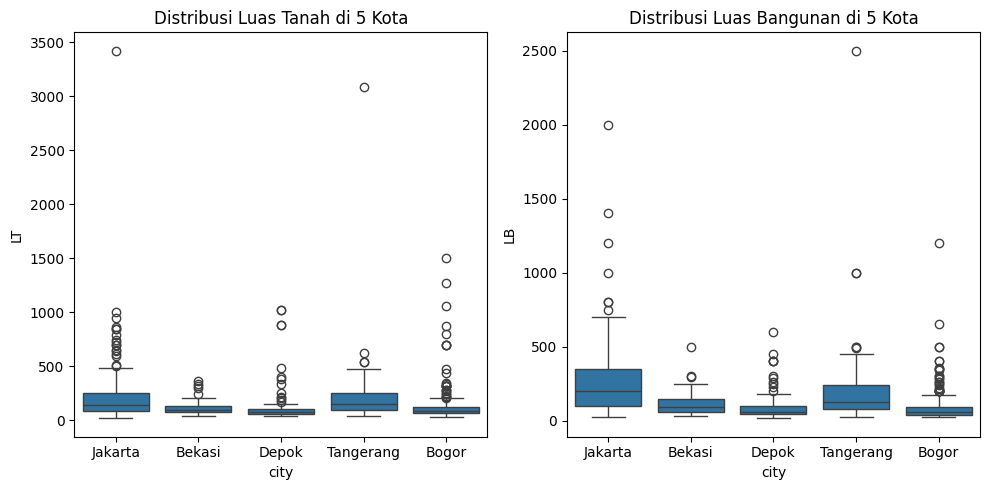

In [107]:
# Menambahakan kolom kota untuk setiap dataframe
jakarta2['city'] = 'Jakarta'
depok2['city'] = 'Depok'
bogor2['city'] = 'Bogor'
tangerang2['city'] = 'Tangerang'
bekasi2['city'] = 'Bekasi'

result = pd.concat([jakarta2, bekasi2, depok2, tangerang2, bogor2], axis=0)
DF = pd.DataFrame(result)
DF

# 1. Membandingkan rata-rata luas tanah per kota
plt.figure(figsize=(6,4))
sns.barplot(x='city', y='LT', data=DF)
plt.title('Rata-rata Luas Tanah di 5 Kota')
plt.xlabel('Kota')
plt.ylabel('Luas Tanah (m²)')
plt.show()

# 2. Membandingkan rata-rata luas bangunan per kota
plt.figure(figsize=(6,4))
sns.barplot(x='city', y='LB', data=DF)
plt.title('Rata-rata Luas Bangunan di 5 Kota')
plt.xlabel('Kota')
plt.ylabel('Luas Bangunan (m²)')
plt.show()

# 3. Membandingkan distribusi luas tanah dan luas bangunan per kota menggunakan boxplot
plt.figure(figsize=(10,5))

# Plot Luas Tanah
plt.subplot(1, 2, 1)
sns.boxplot(x='city', y='LT', data=DF)
plt.title('Distribusi Luas Tanah di 5 Kota')

# Plot Luas Bangunan
plt.subplot(1, 2, 2)
sns.boxplot(x='city', y='LB', data=DF)
plt.title('Distribusi Luas Bangunan di 5 Kota')

plt.tight_layout()
plt.show()

##Interpretasi

Dari ke-4 grafik di atas, dapat disimpulkan bahwa:

1. Rata-rata Luas Bangunan

Dari grafik yang menunjukkan rata-rata luas bangunan, terlihat bahwa Jakarta memiliki luas bangunan tertinggi dibandingkan dengan kota-kota lainnya. Diikuti oleh Tangerang, yang juga mencatatkan ukuran bangunan yang cukup besar. Sebaliknya, Bekasi, Depok, dan Bogor memiliki rata-rata luas bangunan yang lebih kecil, dengan Depok dan Bogor berada pada posisi terendah. Kondisi ini mengindikasikan bahwa properti di Jakarta dan Tangerang cenderung menawarkan bangunan yang lebih besar, kemungkinan disebabkan oleh tingkat perkembangan yang lebih tinggi dan harga pasar yang lebih mahal di wilayah ini.


2. Rata-rata Luas Tanah

Analisis terhadap rata-rata luas tanah mengungkapkan bahwa Jakarta memiliki rata-rata luas tanah tertinggi, sekitar 300 meter persegi. Hal ini mencerminkan bahwa properti di Jakarta umumnya memiliki tanah yang lebih luas dibandingkan dengan kota-kota lain, meskipun terdapat keterbatasan lahan yang dihadapi. Tangerang mengikuti dengan rata-rata luas tanah mendekati 250 meter persegi, yang menunjukkan adanya potensi besar untuk pengembangan properti, terutama di segmen perumahan dan komersial, karena perkembangan urban di area ini belum sepadat Jakarta. Sementara itu, Bogor menunjukkan rata-rata luas tanah sekitar 200 meter persegi, yang menempatkannya di tengah-tengah dibandingkan dengan kota lainnya. Ini menunjukkan bahwa Bogor menawarkan keseimbangan yang baik antara ukuran lahan dan harga, menjadikannya pilihan menarik bagi konsumen yang mencari lahan cukup luas di pinggiran kota. Di sisi lain, Bekasi dan Depok memiliki rata-rata luas tanah yang lebih kecil, sekitar 150 meter persegi atau kurang, menjadikan properti di dua kota ini lebih kompak. Hal ini mungkin lebih cocok untuk pasar menengah yang mencari hunian terjangkau atau untuk keluarga muda.



3. Distribusi Luas Tanah

Dari grafik distribusi luas tanah, Jakarta menunjukkan variasi ukuran tanah yang lebih kecil, meskipun terdapat beberapa properti dengan ukuran yang sangat besar sebagai outliers. Sementara itu, Bogor dan Tangerang menunjukkan adanya beberapa outliers dengan ukuran tanah yang sangat besar, yang menunjukkan bahwa beberapa properti di kedua kota ini memiliki ukuran tanah jauh di atas rata-rata. Di sisi lain, Bekasi dan Depok menunjukkan distribusi tanah yang lebih seragam, dengan ukuran yang terpusat di sekitar nilai median.


4. Distribusi Luas Bangunan

Dalam hal distribusi luas bangunan, Jakarta tetap menunjukkan variasi ukuran yang lebih kecil, tetapi dengan beberapa outliers yang memiliki ukuran bangunan sangat besar. Bogor menunjukkan distribusi luas bangunan yang lebih bervariasi, di mana terdapat beberapa properti dengan ukuran bangunan yang sangat besar. Tangerang juga memiliki beberapa outliers, tetapi ukuran median bangunannya relatif lebih rendah dibandingkan Jakarta. Sementara itu, Bekasi dan Depok menunjukkan bangunan yang lebih kompak dan jarang memiliki outliers, menunjukkan bahwa bangunan di kota-kota ini lebih seragam.




Dari keseluruhan analisis ini, dapat disimpulkan bahwa Jakarta cenderung memiliki properti dengan bangunan yang lebih besar namun dengan luas tanah yang lebih terbatas, hal ini disebabkan oleh tingkat urbanisasi yang tinggi dan keterbatasan lahan di ibukota. Tangerang menunjukkan potensi pertumbuhan yang besar dengan bangunan besar dan beberapa properti dengan luas tanah yang luas. Bogor memiliki variasi ukuran tanah dan bangunan yang cukup tinggi, menunjukkan potensi untuk pengembangan properti besar atau estate. Sementara itu, Bekasi dan Depok dengan bangunan yang lebih kecil dan seragam, lebih cocok untuk segmen pasar menengah atau properti yang lebih terjangkau.

